<a href="https://colab.research.google.com/github/satvik-dixit/feature_importance/blob/main/FI_all_emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing FI over different emotions

A demo for comparing feature importance results of multiple emotions. For this notebook, we use the CREMA-D dataset. 

Emotions:
- Angry
- Disgusted
- Fearful
- Happy
- Sad


We look at the openSMILE egemaps features obtained by using the following techniques:
1. Permutation Importance
2. Standard Methods
  - Logistic Regression
  - SVM
  - Random Forest
  - Combined (average of Logistic Regression, SVM, Random Forest with recall as weights)

Lets start by importing a few packages

In [1]:
!git clone -q https://github.com/GasserElbanna/serab-byols.git
!python3 -m pip install -q -e ./serab-byols

!pip install -q tqdm==4.60.0
!pip install -q opensmile

     |████████████████████████████████| 75 kB 2.2 MB/s 
     |████████████████████████████████| 4.5 MB 7.7 MB/s 
     |████████████████████████████████| 48 kB 4.7 MB/s 
     |████████████████████████████████| 635 kB 57.3 MB/s 
     |████████████████████████████████| 167 kB 46.9 MB/s 


In [ ]:
# code to restart runtime so the packages get installed
import os
os.kill(os.getpid(), 9)

In [1]:
! pip install -q kaggle

from google.colab import files
files.upload()
files.upload()

# Name directory
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


Saving utilities.py to utilities.py


Saving kaggle.json to kaggle.json


In [2]:
import os
import numpy as np
from tqdm import tqdm
from glob import glob
from random import sample

import librosa
import soundfile as sf

import torch
import opensmile
import serab_byols

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

from utilities import load_audio_files, get_egemaps_feature_names, audio_embeddings_model, audio_embeddings, speaker_normalisation, label_division, split_train_test, get_hyperparams, pipeline, permutation_importance_method, NormalizeData, coef_logreg_plot, coef_svm_plot, random_forest_plot, combined_feature_rank


### About CREMA-D:
- A German database of emotional speech
- 800 recordings
- 10 actors (5 males and 5 females)
- 7 emotions: anger, neutral, fear, boredom, happiness, sadness, disgust

### References:
- Dataset: http://emodb.bilderbar.info/index-1280.html
- Paper: https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.130.8506&rep=rep1&type=pdf




# Phase 1: Loading audio files and extracting metadata

Includes downloading the dataset, loading audio files, resampling audio files, extracting metadata



### Loading CREMA-D dataset and extracting metadata

In [3]:
# Phase_1
# Load dataset
! kaggle datasets download -q -d ejlok1/cremad
! unzip -q cremad.zip

# Load and resample audio files
audio_files = glob(os.path.join('/content/AudioWAV','*.wav'))
audio_list = load_audio_files(audio_files, resampling_frequency=16000)

# Make speakers list and labels list 
speakers = []
labels = []
for audio_file in audio_files:
  file_name = audio_file.split('/')[3]
  speakers.append(int(file_name[:4]))
  labels.append(file_name[9:12])


# Verify phase_1
print('Number of audio files: {}'.format(len(audio_list)))
print('Number of speaker classes: {}'.format(len(set(speakers))))
print('Speaker classes: {}'.format(set(speakers)))
print('Number of speakers: {}'.format(len(speakers)))
print('Number of label classes: {}'.format(len(set(labels))))
print('Label classes: {}'.format(set(labels)))
print('Number of labels: {}'.format(len(labels)))

model = audio_embeddings_model(model_name='egemaps')
egemaps_feature_names = get_egemaps_feature_names()
embeddings_array_egemaps = audio_embeddings(audio_list, model_name='egemaps', model=model)
normalised_embeddings_egemaps = speaker_normalisation(embeddings_array_egemaps, speakers)



Number of audio files: 7442
Number of speaker classes: 91
Speaker classes: {1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023}
Number of speakers: 7442
Number of label classes: 6
Label classes: {'FEA', 'SAD', 'HAP', 'NEU', 'ANG', 'DIS'}
Number of labels: 7442


100%|██████████| 7442/7442 [12:29<00:00,  9.93it/s]


# Emotion 1: Happy 

In [4]:
labeled_array_egemaps, labels_list_egemaps, labeled_speakers_list = label_division(normalised_embeddings_egemaps, labels, ['NEU', 'HAP'], speakers)
color='#7FFFD4'

## Part 1: Permutation Importance

permutation_importance


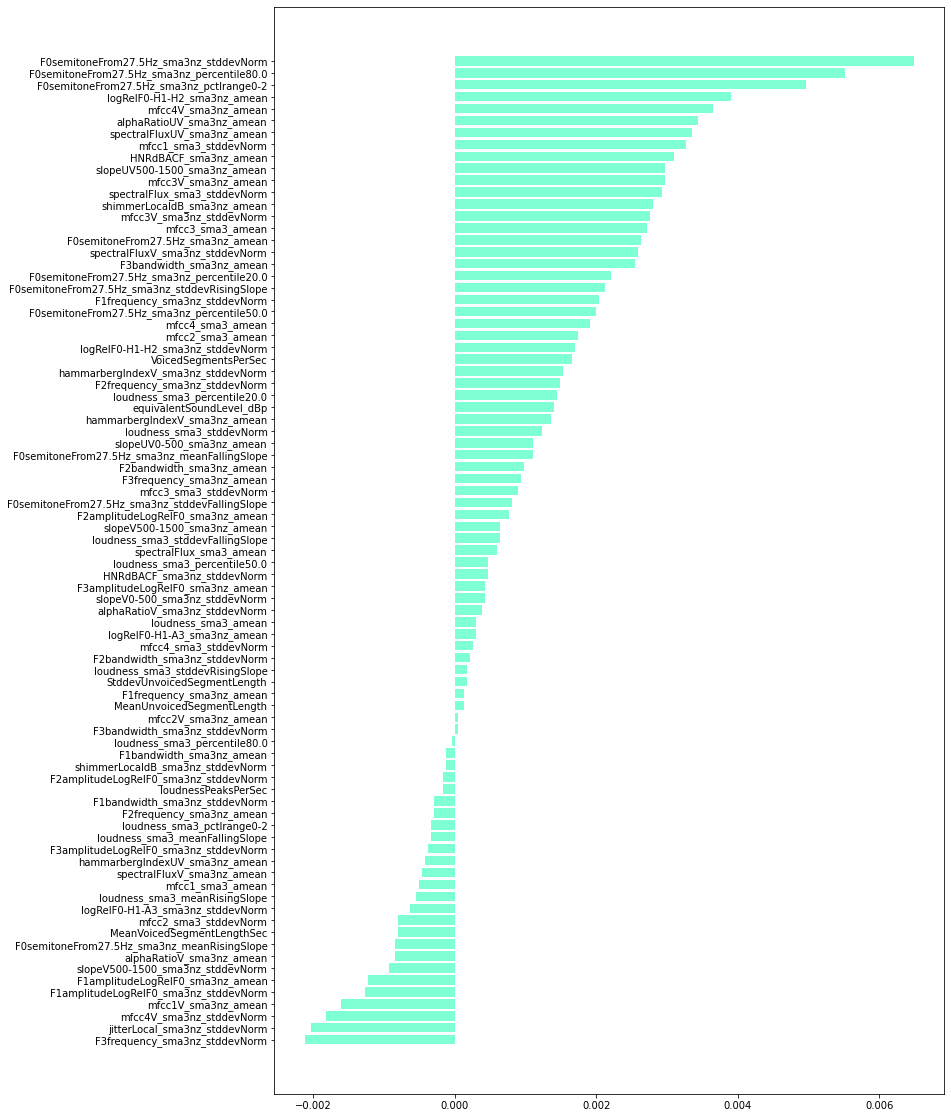

In [5]:
permutation_importance_method(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=False, plot=True)
print('permutation_importance')

['alphaRatioUV_sma3nz_amean', 'spectralFluxUV_sma3nz_amean', 'shimmerLocaldB_sma3nz_amean', 'HNRdBACF_sma3nz_amean', 'mfcc4V_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_amean', 'logRelF0-H1-H2_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0']
permutation_importance


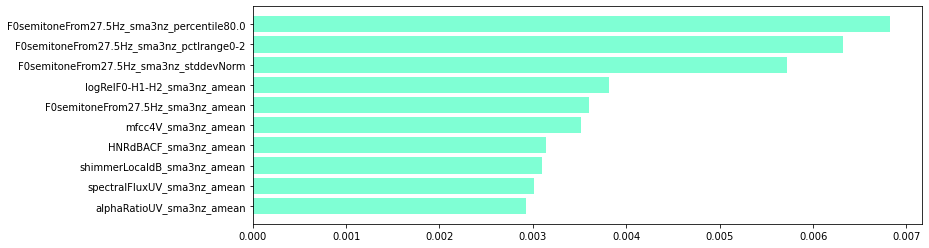

In [6]:
permutation_importance_method(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True, plot=True)
print('permutation_importance')

## Part 2: Standard methods

### Logistic regression

LOGISTIC REGRESSION


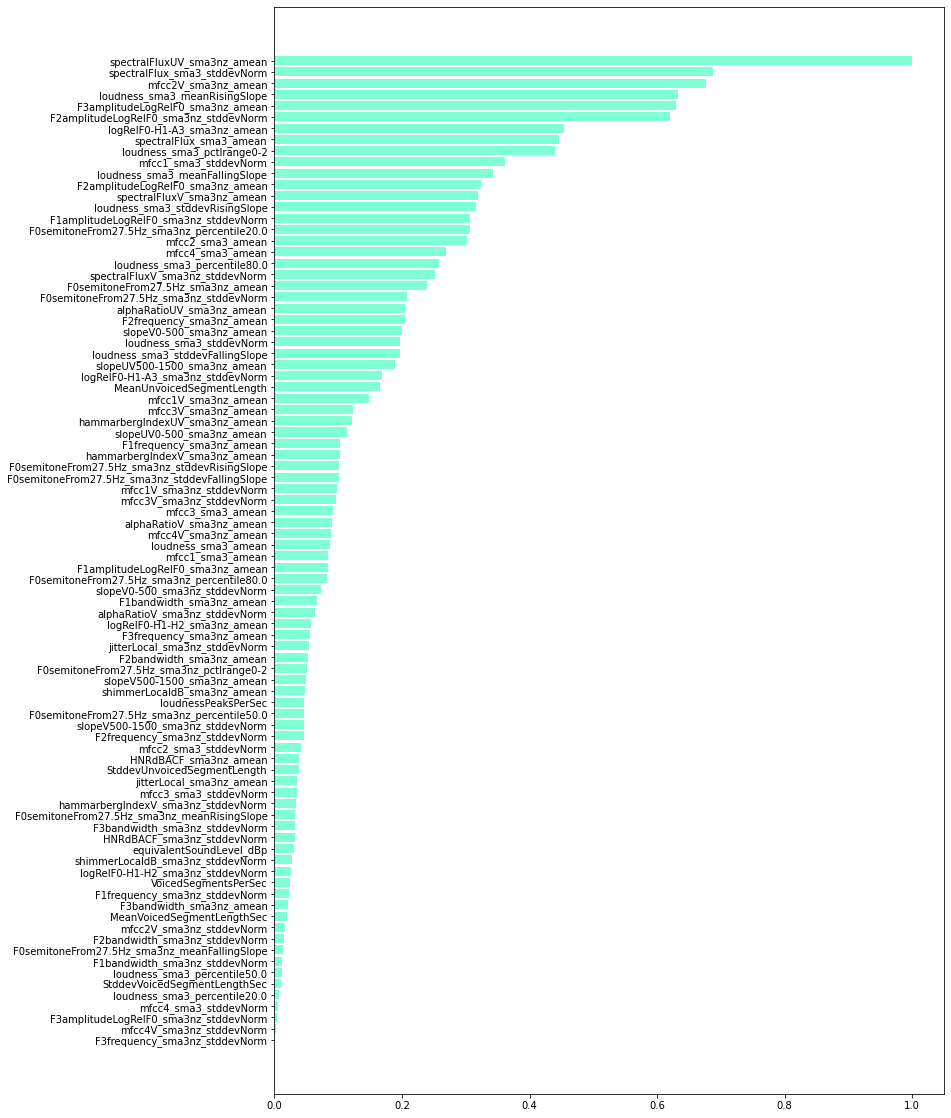

In [7]:

coef_logreg_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color)
print('LOGISTIC REGRESSION')

['mfcc1_sma3_stddevNorm', 'loudness_sma3_pctlrange0-2', 'spectralFlux_sma3_amean', 'logRelF0-H1-A3_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean', 'loudness_sma3_meanRisingSlope', 'mfcc2V_sma3nz_amean', 'spectralFlux_sma3_stddevNorm', 'spectralFluxUV_sma3nz_amean']
LOGISTIC REGRESSION


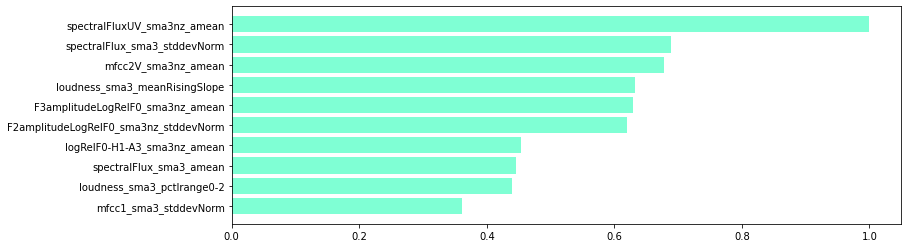

In [8]:

coef_logreg_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True)
print('LOGISTIC REGRESSION')

### SVM

SVM


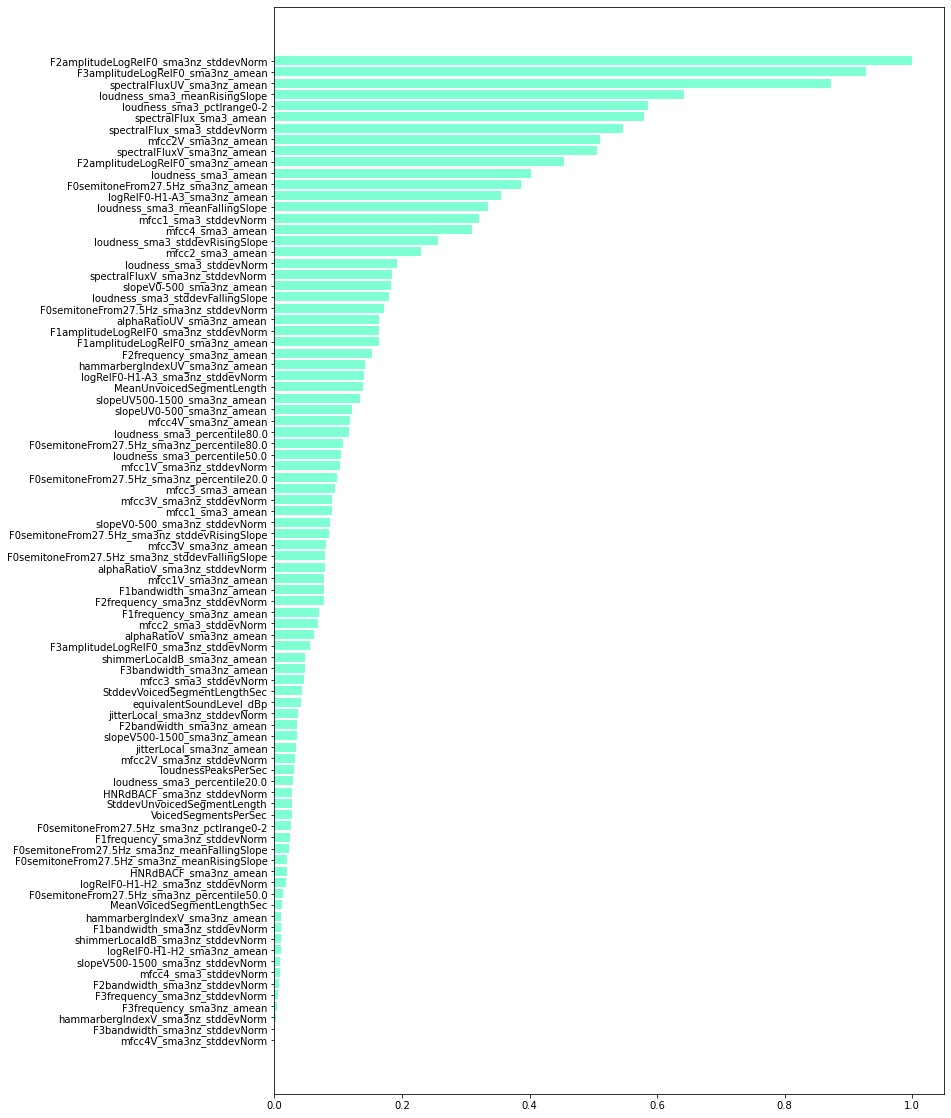

In [9]:

coef_svm_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color)
print('SVM')

['F2amplitudeLogRelF0_sma3nz_amean', 'spectralFluxV_sma3nz_amean', 'mfcc2V_sma3nz_amean', 'spectralFlux_sma3_stddevNorm', 'spectralFlux_sma3_amean', 'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope', 'spectralFluxUV_sma3nz_amean', 'F3amplitudeLogRelF0_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_stddevNorm']
SVM


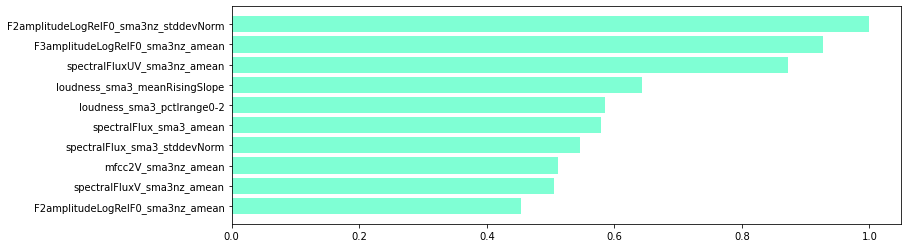

In [10]:
coef_svm_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True)
print('SVM')

### Random Forest

RANDOM FOREST


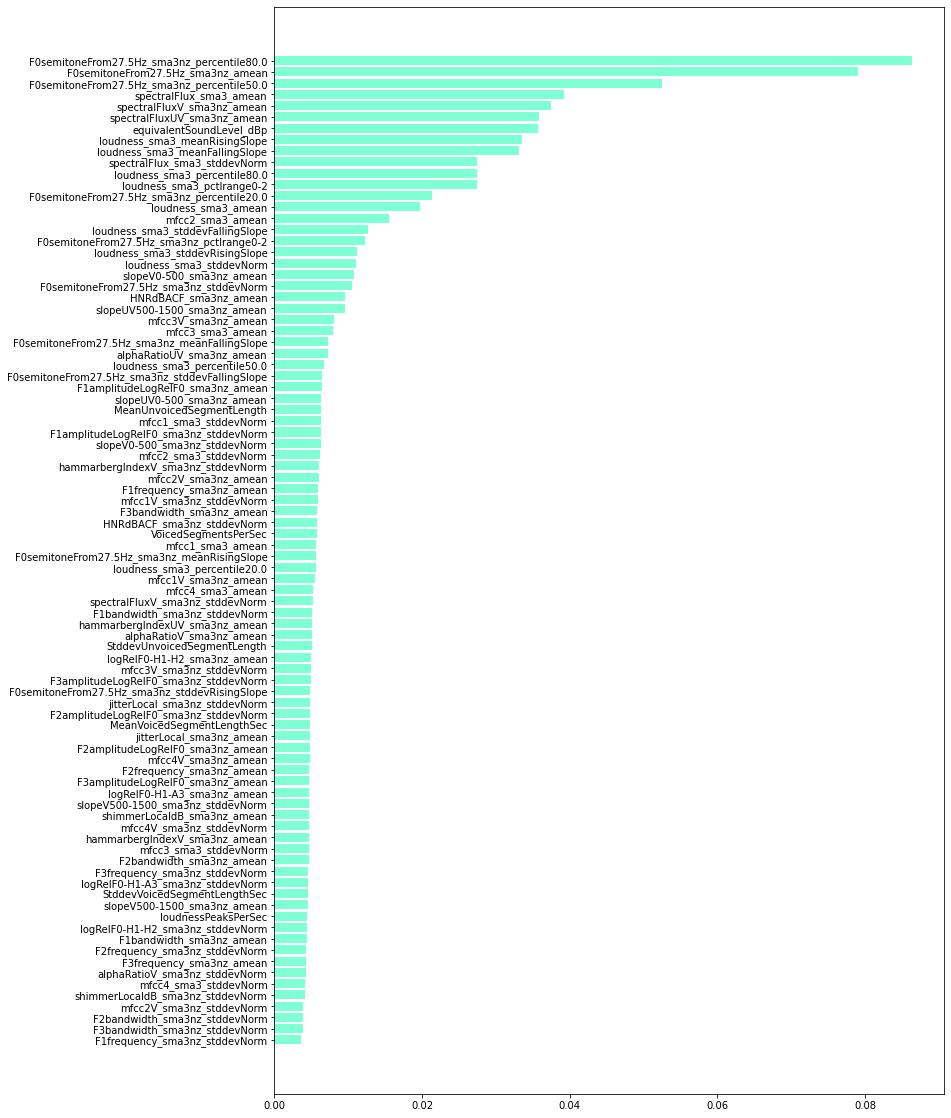

In [11]:

random_forest_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color)
print('RANDOM FOREST')

['loudness_sma3_meanRisingSlope', 'loudness_sma3_meanFallingSlope', 'loudness_sma3_pctlrange0-2', 'spectralFluxV_sma3nz_amean', 'equivalentSoundLevel_dBp', 'spectralFluxUV_sma3nz_amean', 'spectralFlux_sma3_amean', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'F0semitoneFrom27.5Hz_sma3nz_amean']
RANDOM FOREST


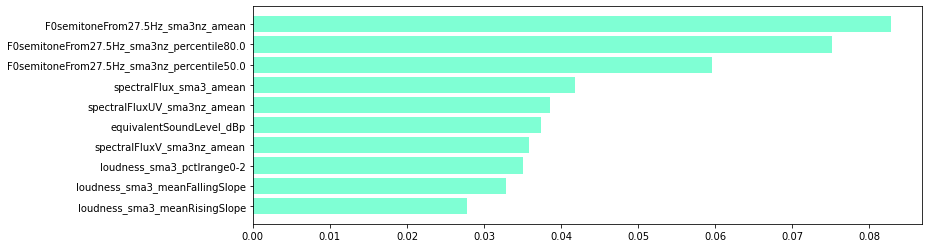

In [12]:
random_forest_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True)
print('RANDOM FOREST')

### Combined

recall_macro on test_set: 0.8602746138243096
recall_macro on test_set: 0.8873810625082595
recall_macro on test_set: 0.8315696649029982
COMBINED STANDARD METHODS


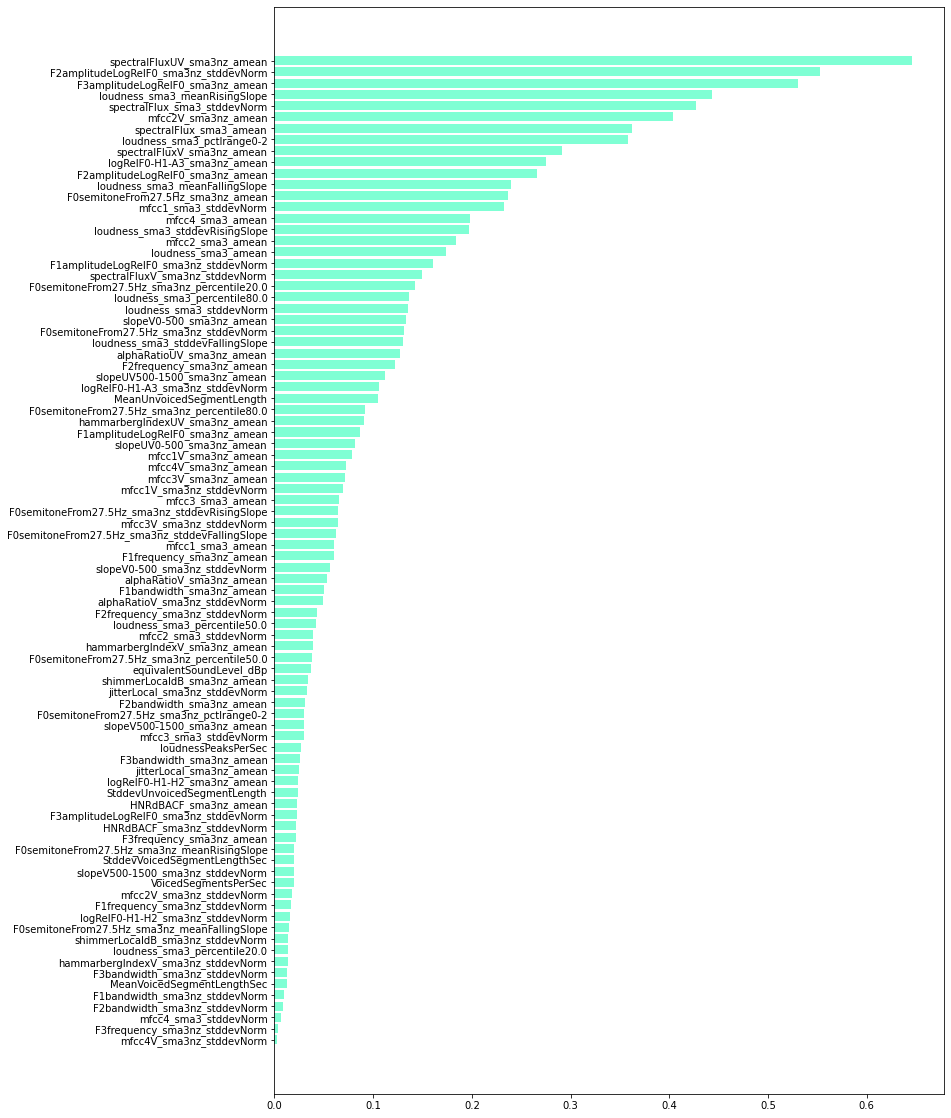

In [13]:
combined_feature_rank(labeled_array_egemaps, labels_list_egemaps, labeled_speakers_list, egemaps_feature_names, color=color, top_ten=False)
print('COMBINED STANDARD METHODS')

recall_macro on test_set: 0.8626060801375013
recall_macro on test_set: 0.8892388171239458
recall_macro on test_set: 0.8745597654266385
['logRelF0-H1-A3_sma3nz_amean', 'spectralFluxV_sma3nz_amean', 'loudness_sma3_pctlrange0-2', 'spectralFlux_sma3_amean', 'mfcc2V_sma3nz_amean', 'spectralFlux_sma3_stddevNorm', 'loudness_sma3_meanRisingSlope', 'F3amplitudeLogRelF0_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'spectralFluxUV_sma3nz_amean']
COMBINED STANDARD METHODS


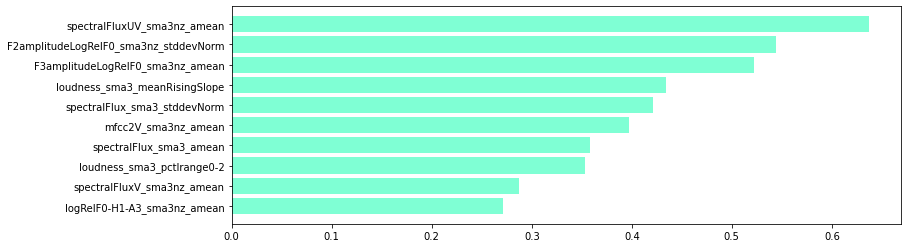

In [14]:
combined_feature_rank(labeled_array_egemaps, labels_list_egemaps, labeled_speakers_list, egemaps_feature_names, color=color, top_ten=True)
print('COMBINED STANDARD METHODS')

# Emotion 2: Angry 

In [74]:
labeled_array_egemaps, labels_list_egemaps, labeled_speakers_list = label_division(normalised_embeddings_egemaps, labels, ['NEU', 'ANG'], speakers)
color=	'#FF3030'

## Part 1: Permutation Importance

permutation_importance


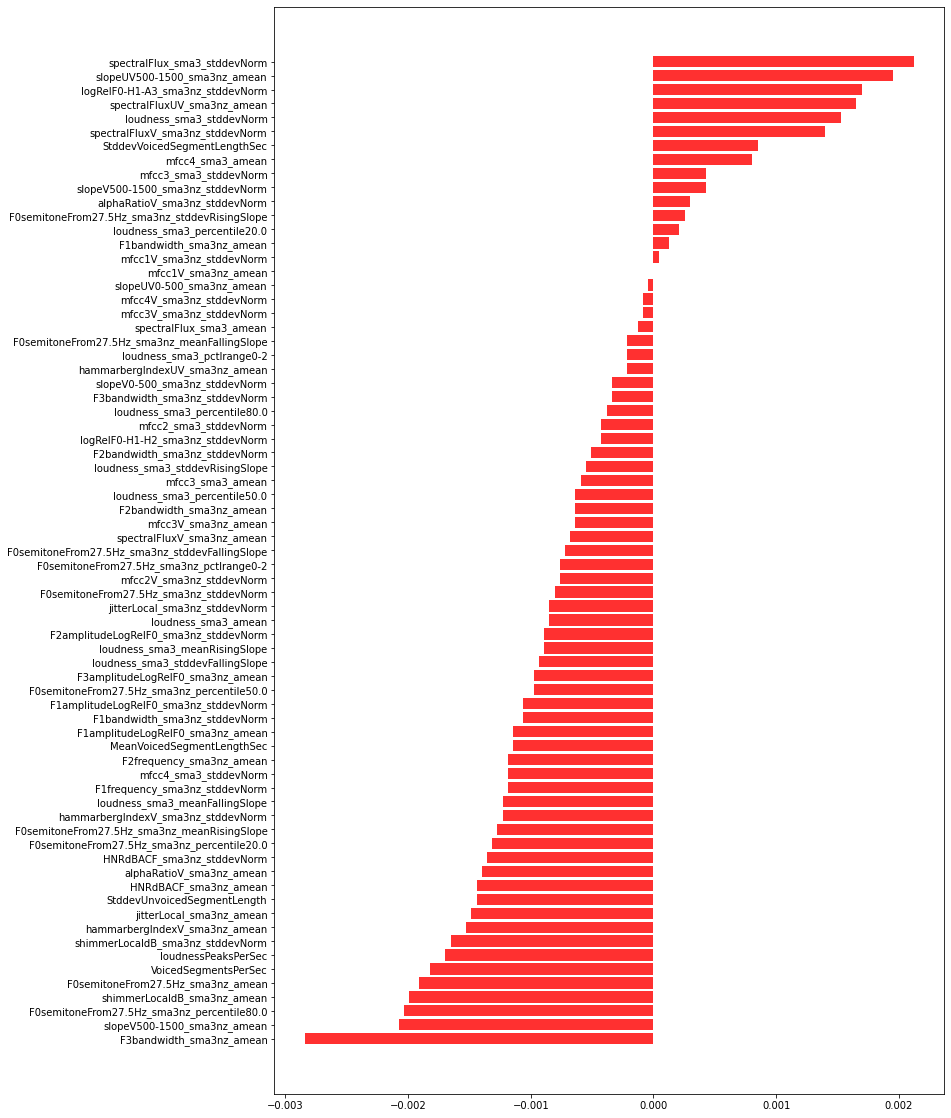

In [75]:
permutation_importance_method(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=False, plot=True)
print('permutation_importance')

['alphaRatioV_sma3nz_stddevNorm', 'slopeUV500-1500_sma3nz_amean', 'mfcc3_sma3_stddevNorm', 'spectralFluxUV_sma3nz_amean', 'StddevVoicedSegmentLengthSec', 'mfcc4_sma3_amean', 'loudness_sma3_stddevNorm', 'logRelF0-H1-A3_sma3nz_stddevNorm', 'spectralFluxV_sma3nz_stddevNorm', 'spectralFlux_sma3_stddevNorm']
permutation_importance


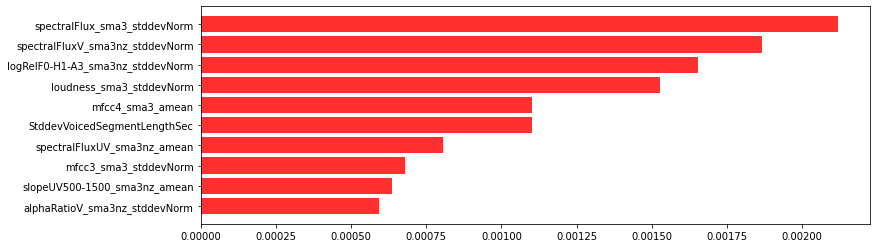

In [76]:
permutation_importance_method(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True, plot=True)
print('permutation_importance')

## Part 2: Standard methods

### Logistic regression

LOGISTIC REGRESSION


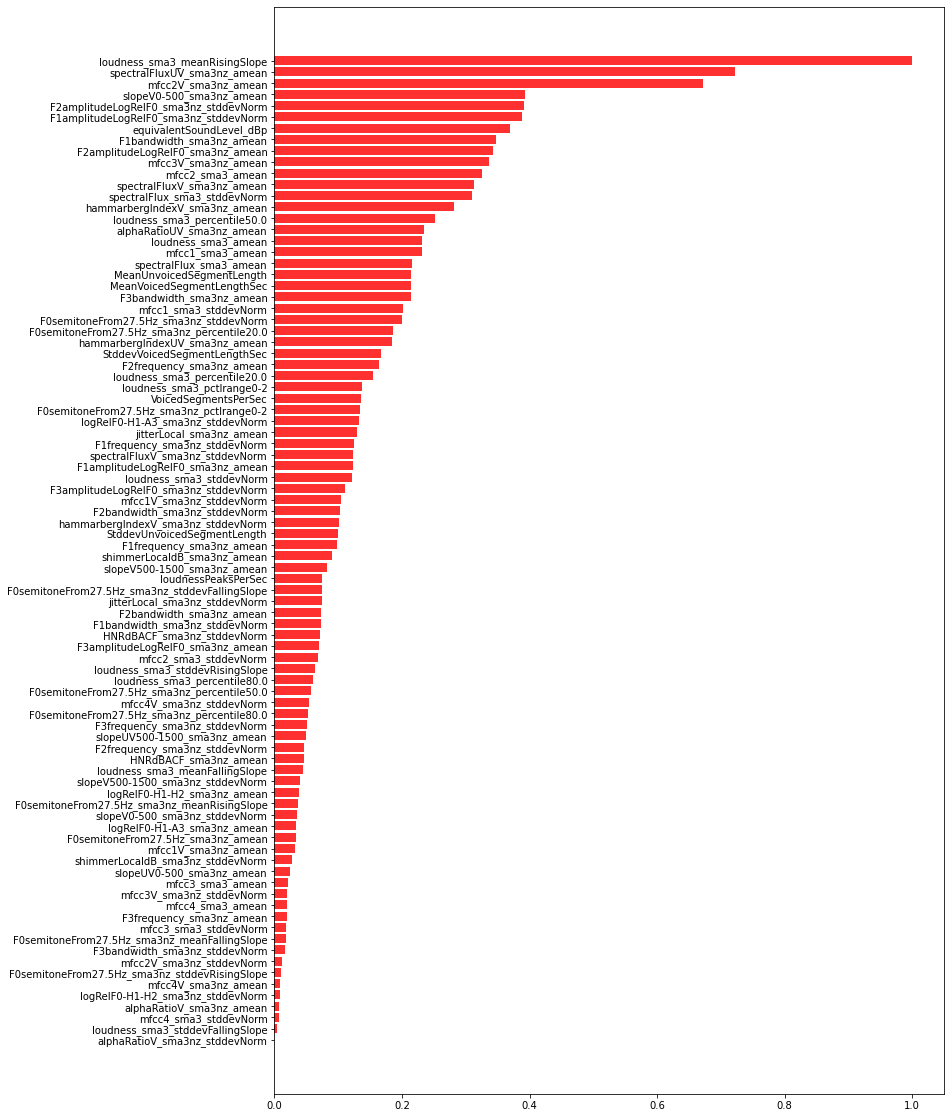

In [18]:

coef_logreg_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color)
print('LOGISTIC REGRESSION')

['mfcc3V_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_amean', 'F1bandwidth_sma3nz_amean', 'equivalentSoundLevel_dBp', 'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean', 'mfcc2V_sma3nz_amean', 'spectralFluxUV_sma3nz_amean', 'loudness_sma3_meanRisingSlope']
LOGISTIC REGRESSION


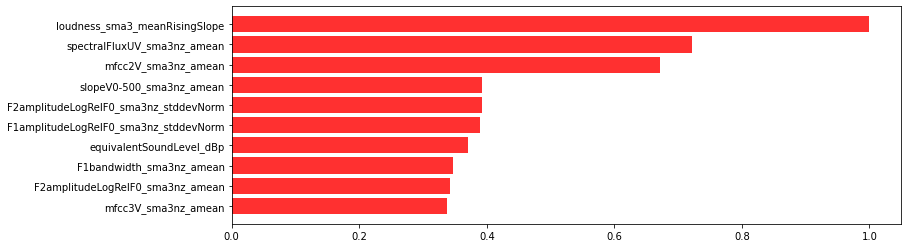

In [19]:

coef_logreg_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True)
print('LOGISTIC REGRESSION')

### SVM

SVM


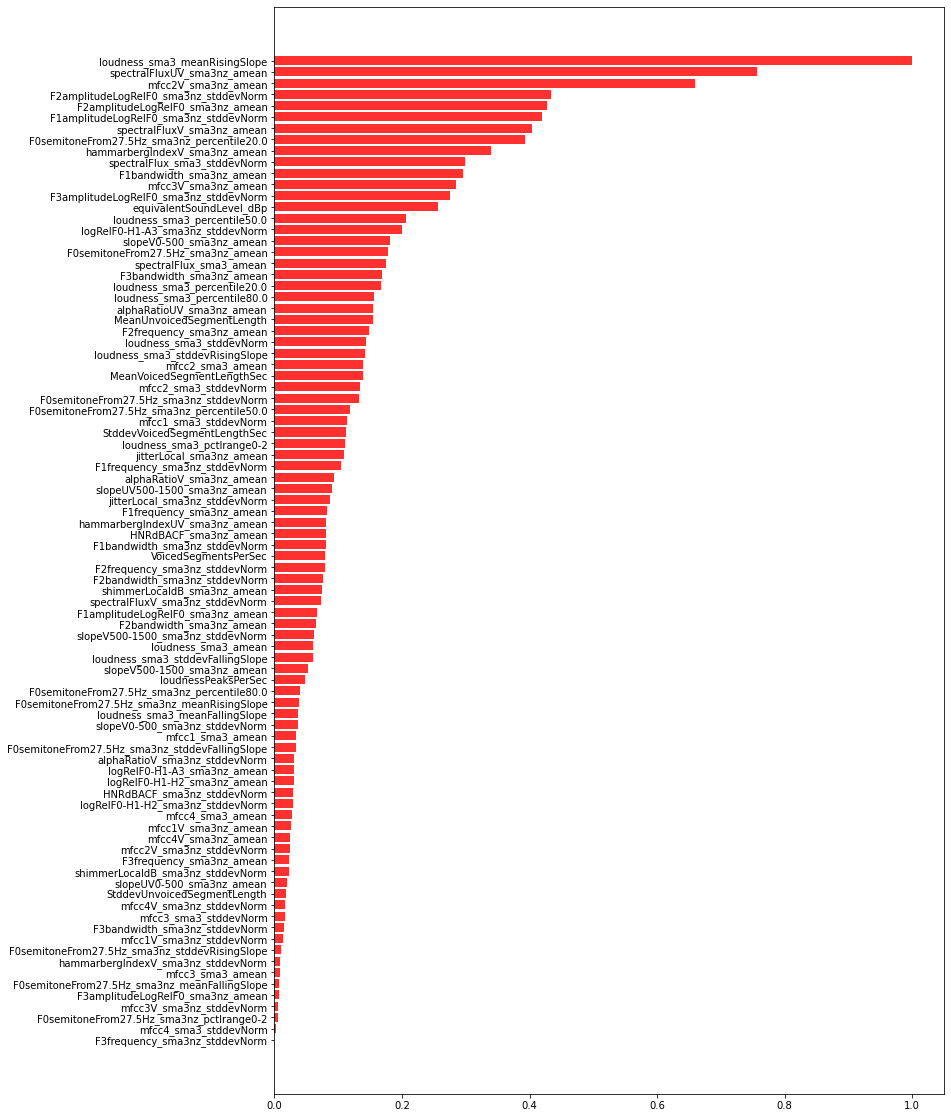

In [20]:

coef_svm_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color)
print('SVM')

['spectralFlux_sma3_stddevNorm', 'hammarbergIndexV_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'spectralFluxV_sma3nz_amean', 'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean', 'spectralFluxUV_sma3nz_amean', 'loudness_sma3_meanRisingSlope']
SVM


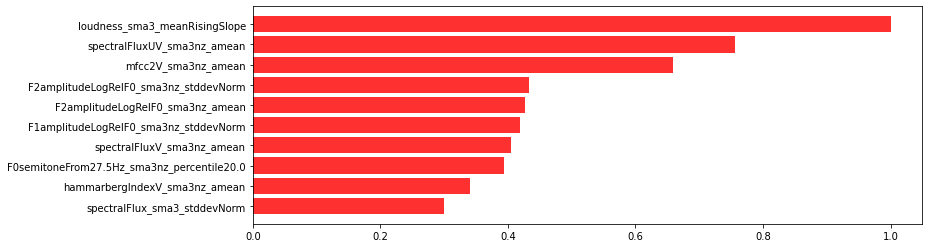

In [21]:
coef_svm_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True)
print('SVM')

### Random Forest

RANDOM FOREST


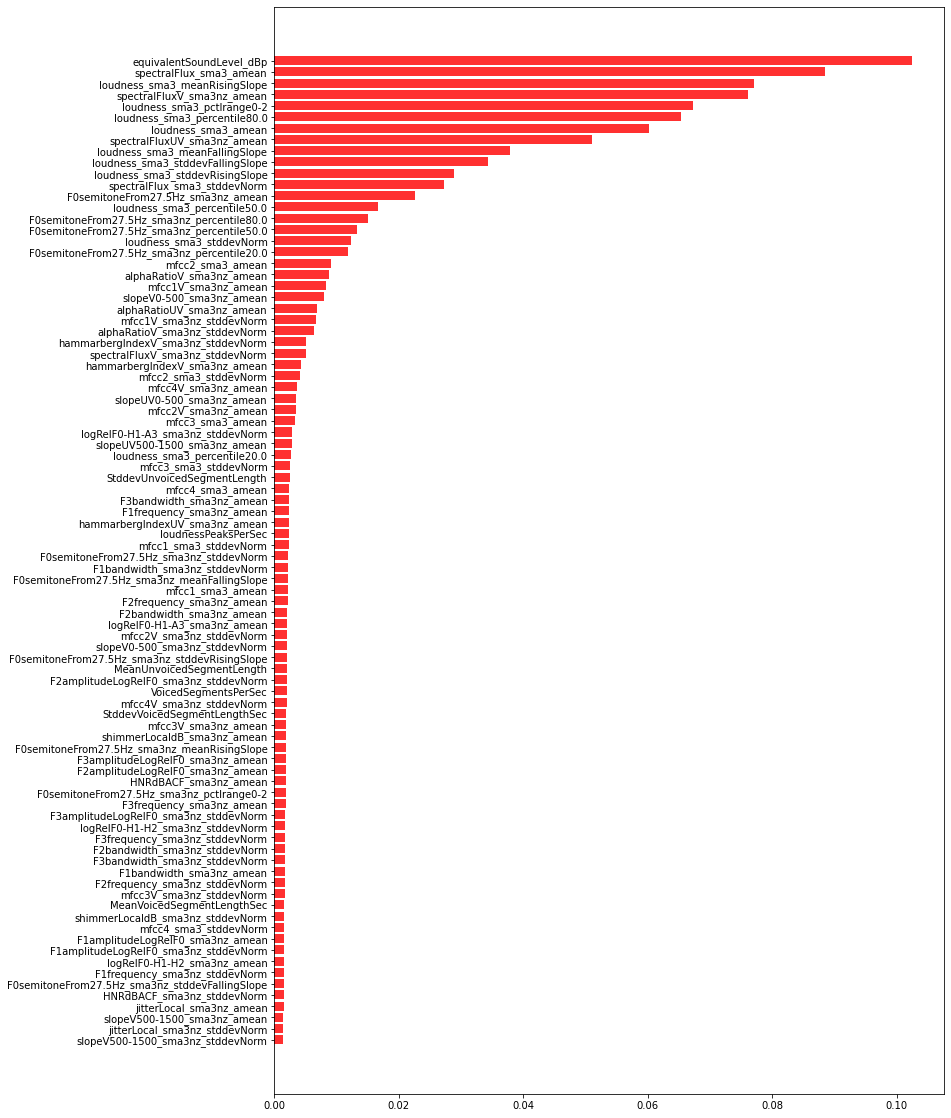

In [22]:

random_forest_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color)
print('RANDOM FOREST')

['loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope', 'spectralFluxUV_sma3nz_amean', 'loudness_sma3_percentile80.0', 'loudness_sma3_amean', 'loudness_sma3_meanRisingSlope', 'loudness_sma3_pctlrange0-2', 'equivalentSoundLevel_dBp', 'spectralFluxV_sma3nz_amean', 'spectralFlux_sma3_amean']
RANDOM FOREST


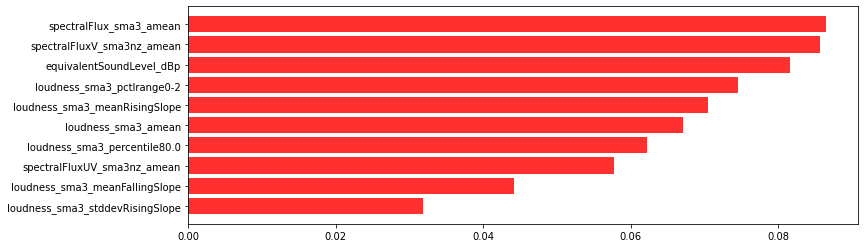

In [23]:
random_forest_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True)
print('RANDOM FOREST')

### Combined

recall_macro on test_set: 0.9390674398414336
recall_macro on test_set: 0.9593060612550868
recall_macro on test_set: 0.9519951562680198
COMBINED STANDARD METHODS


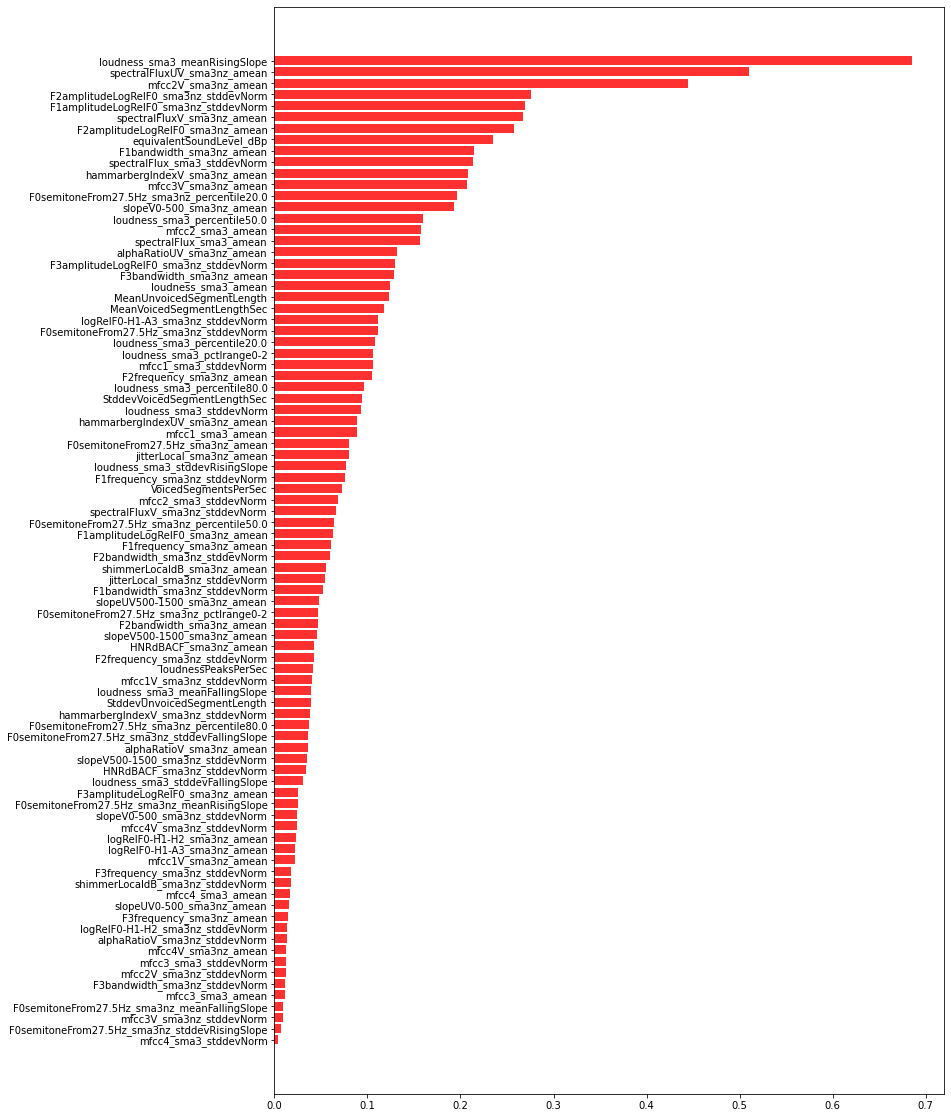

In [24]:
combined_feature_rank(labeled_array_egemaps, labels_list_egemaps, labeled_speakers_list, egemaps_feature_names, color=color, top_ten=False)
print('COMBINED STANDARD METHODS')

recall_macro on test_set: 0.9587742504409171
recall_macro on test_set: 0.9600922240241125
recall_macro on test_set: 0.9479875389408099
['spectralFlux_sma3_stddevNorm', 'F1bandwidth_sma3nz_amean', 'equivalentSoundLevel_dBp', 'F2amplitudeLogRelF0_sma3nz_amean', 'spectralFluxV_sma3nz_amean', 'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean', 'spectralFluxUV_sma3nz_amean', 'loudness_sma3_meanRisingSlope']
COMBINED STANDARD METHODS


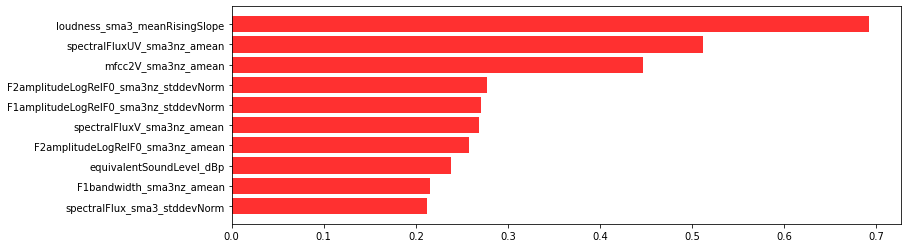

In [25]:
combined_feature_rank(labeled_array_egemaps, labels_list_egemaps, labeled_speakers_list, egemaps_feature_names, color=color, top_ten=True)
print('COMBINED STANDARD METHODS')

# Emotion 3: Sad

In [61]:
labeled_array_egemaps, labels_list_egemaps, labeled_speakers_list = label_division(normalised_embeddings_egemaps, labels, ['NEU', 'SAD'], speakers)
color=	'#C0FF3E'

## Part 1: Permutation Importance

permutation_importance


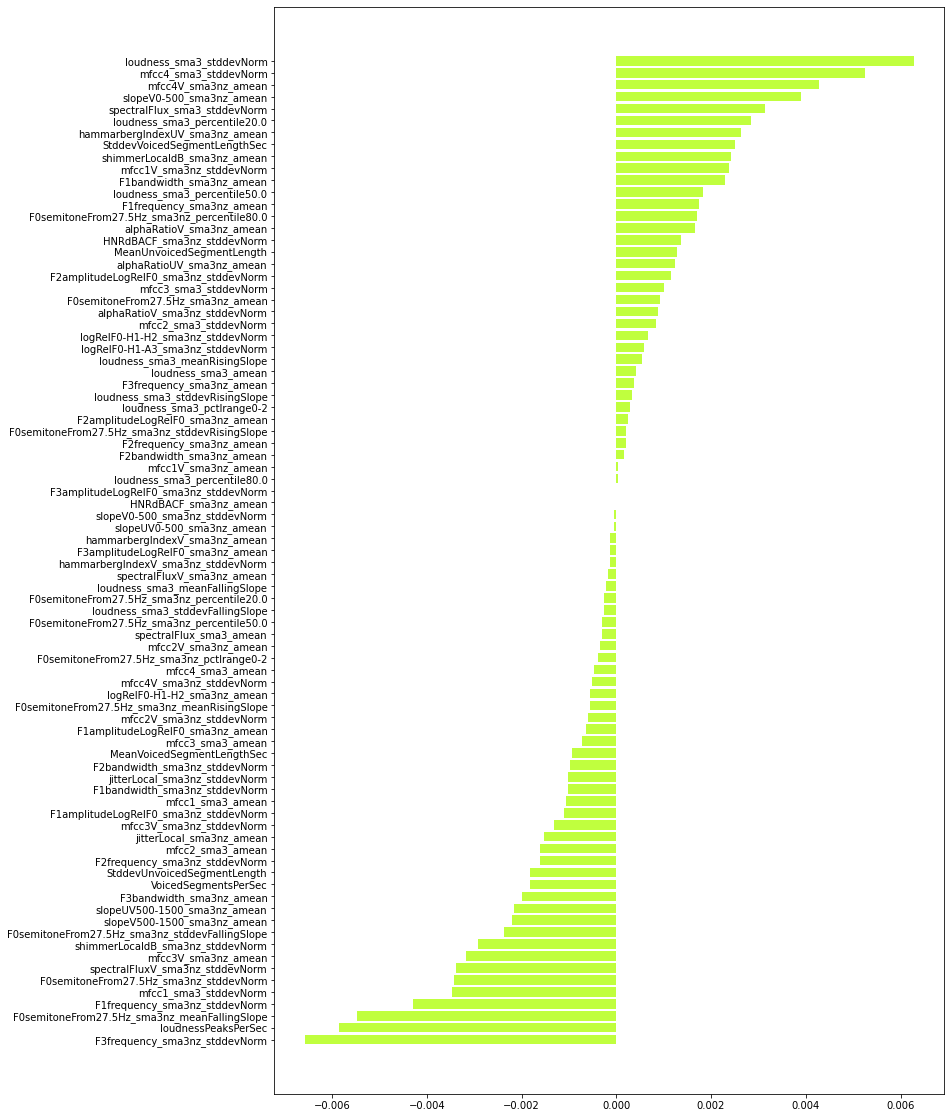

In [62]:
permutation_importance_method(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=False, plot=True)
print('permutation_importance')

['F2amplitudeLogRelF0_sma3nz_stddevNorm', 'spectralFlux_sma3_stddevNorm', 'loudness_sma3_percentile20.0', 'F1bandwidth_sma3nz_amean', 'MeanUnvoicedSegmentLength', 'alphaRatioV_sma3nz_amean', 'slopeV0-500_sma3nz_amean', 'loudness_sma3_stddevNorm', 'mfcc4_sma3_stddevNorm', 'mfcc4V_sma3nz_amean']
permutation_importance


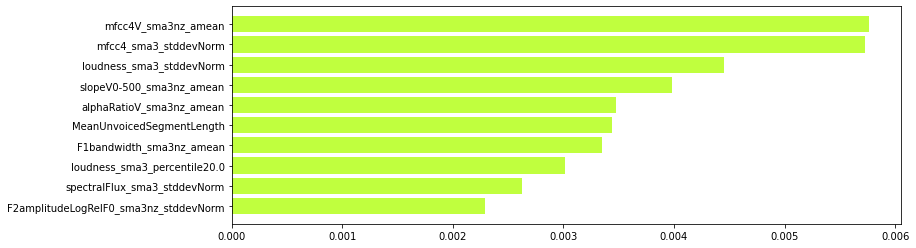

In [63]:
permutation_importance_method(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True, plot=True)
print('permutation_importance')

## Part 2: Standard methods

### Logistic regression

LOGISTIC REGRESSION


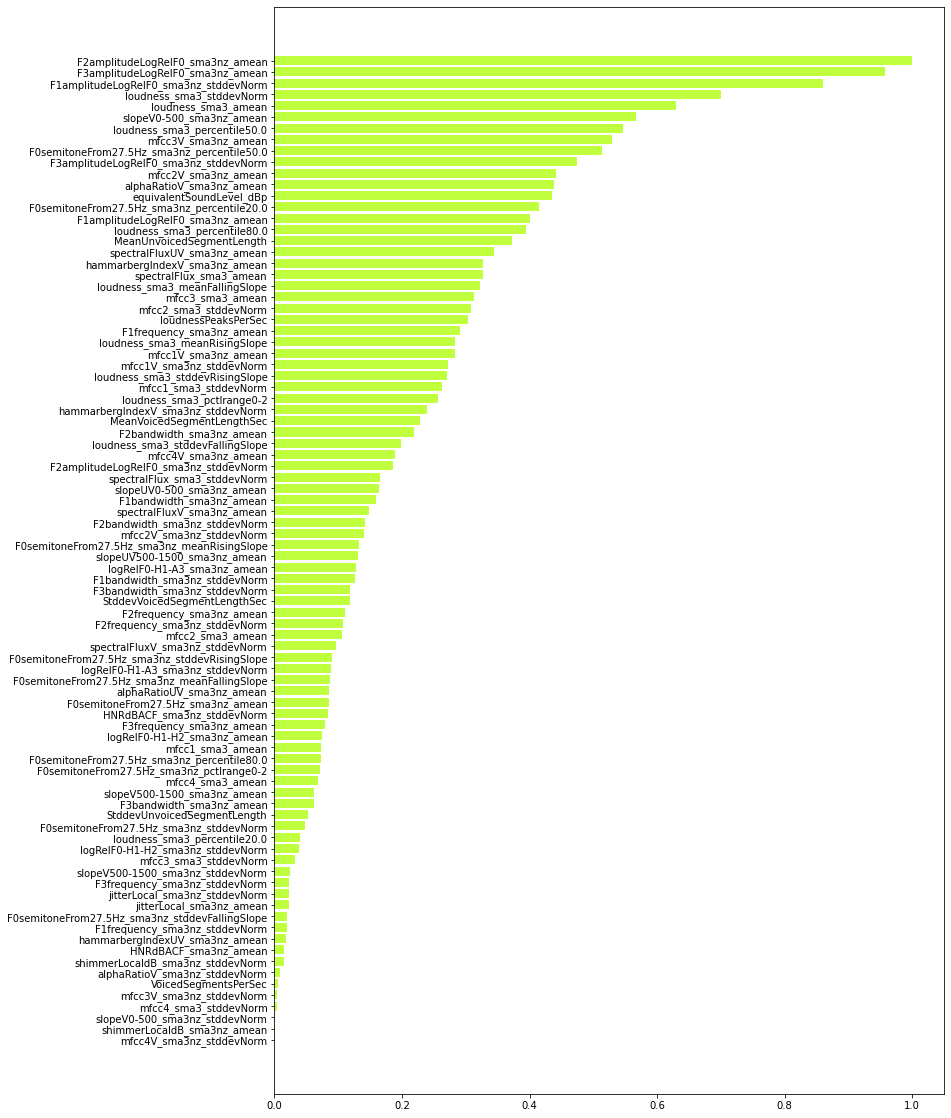

In [64]:

coef_logreg_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color)
print('LOGISTIC REGRESSION')

['F3amplitudeLogRelF0_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'mfcc3V_sma3nz_amean', 'loudness_sma3_percentile50.0', 'slopeV0-500_sma3nz_amean', 'loudness_sma3_amean', 'loudness_sma3_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_amean']
LOGISTIC REGRESSION


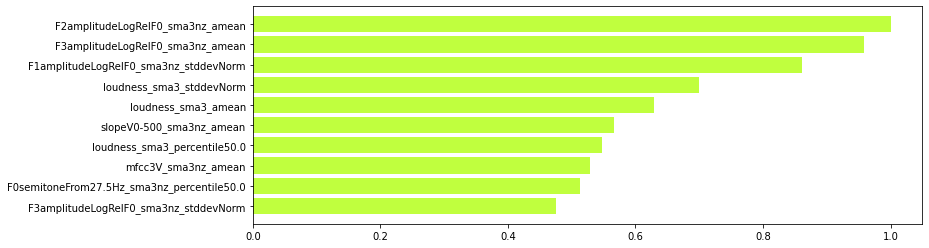

In [65]:

coef_logreg_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True)
print('LOGISTIC REGRESSION')

### SVM

SVM


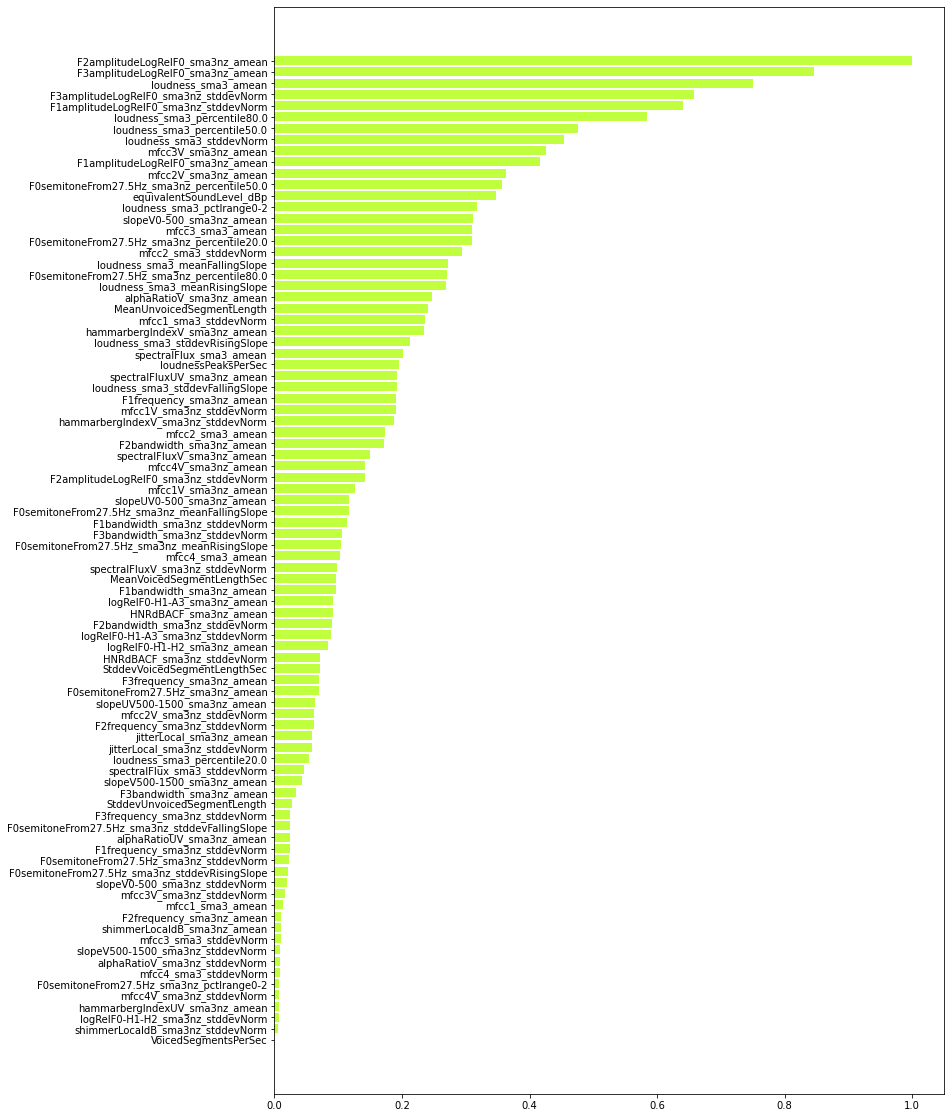

In [66]:

coef_svm_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color)
print('SVM')

['F1amplitudeLogRelF0_sma3nz_amean', 'mfcc3V_sma3nz_amean', 'loudness_sma3_stddevNorm', 'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0', 'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'loudness_sma3_amean', 'F3amplitudeLogRelF0_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_amean']
SVM


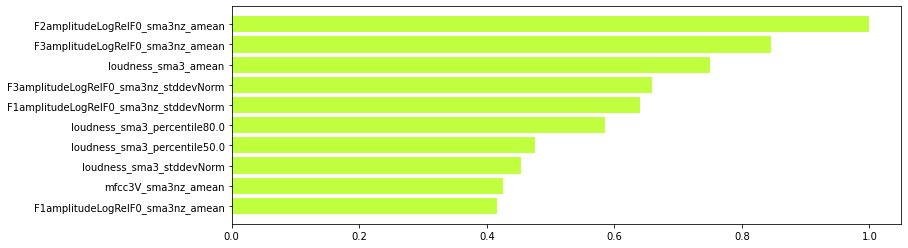

In [67]:
coef_svm_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True)
print('SVM')

### Random Forest

RANDOM FOREST


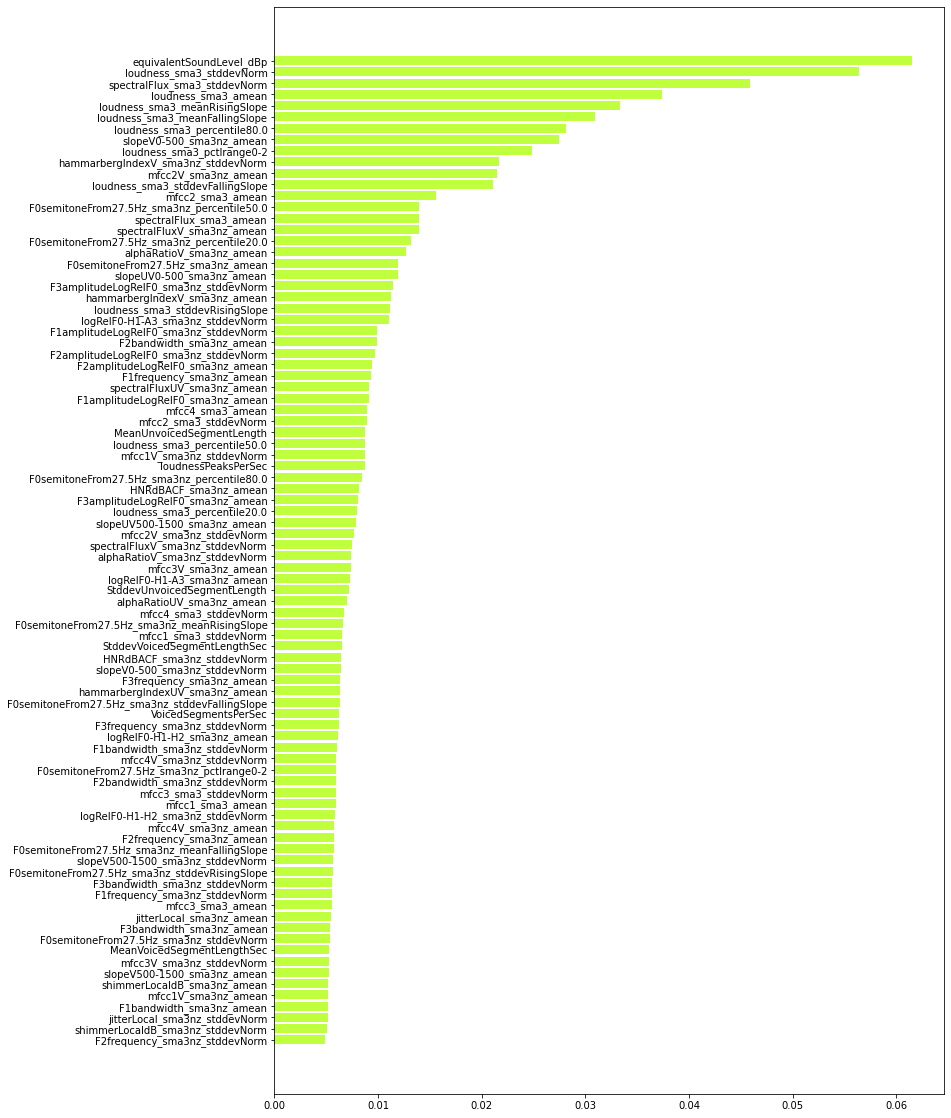

In [68]:

random_forest_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color)
print('RANDOM FOREST')

['hammarbergIndexV_sma3nz_stddevNorm', 'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanFallingSlope', 'slopeV0-500_sma3nz_amean', 'loudness_sma3_percentile80.0', 'loudness_sma3_meanRisingSlope', 'loudness_sma3_amean', 'spectralFlux_sma3_stddevNorm', 'loudness_sma3_stddevNorm', 'equivalentSoundLevel_dBp']
RANDOM FOREST


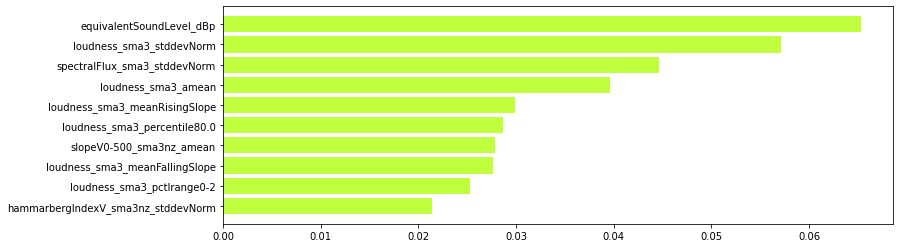

In [69]:
random_forest_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True)
print('RANDOM FOREST')

### Combined

recall_macro on test_set: 0.80489417989418
recall_macro on test_set: 0.8386452378206501
recall_macro on test_set: 0.8275590938129638
COMBINED STANDARD METHODS


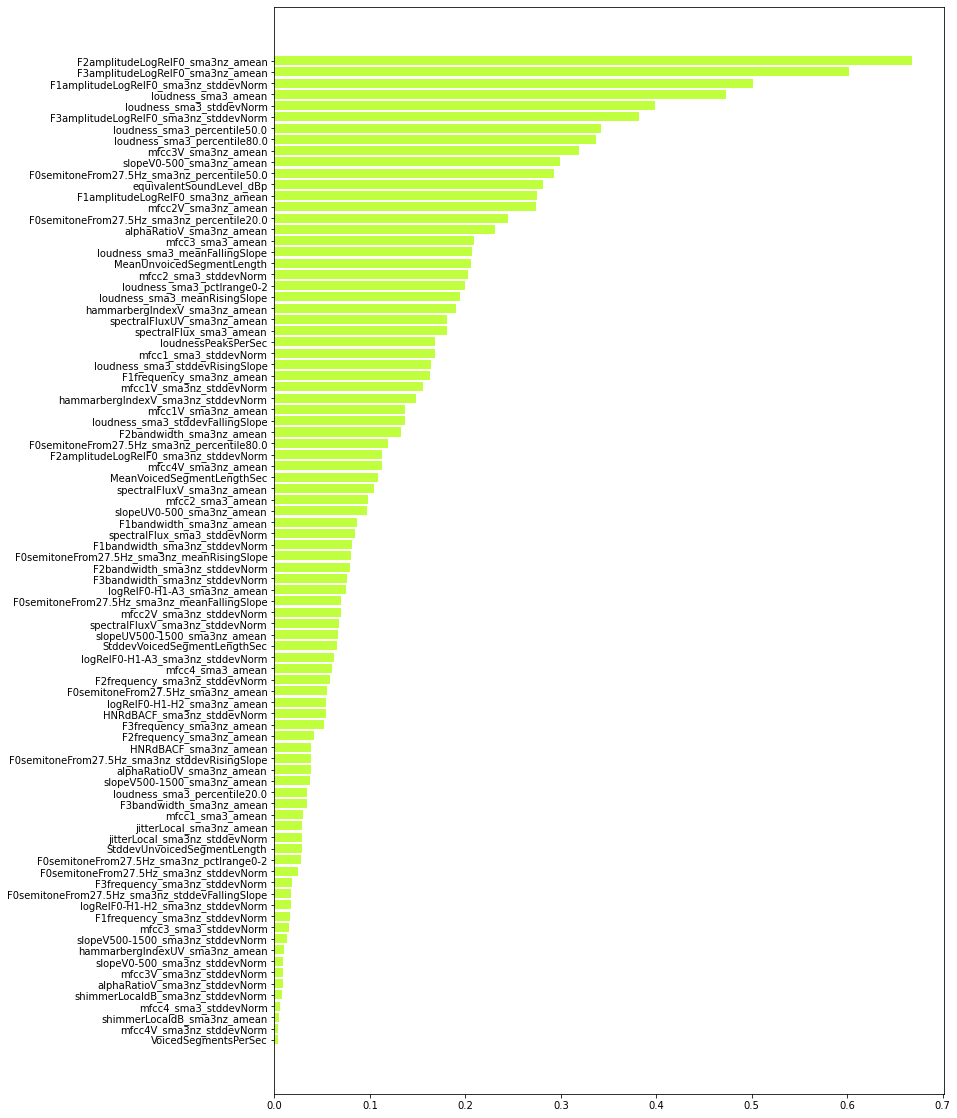

In [70]:
combined_feature_rank(labeled_array_egemaps, labels_list_egemaps, labeled_speakers_list, egemaps_feature_names, color=color, top_ten=False)
print('COMBINED STANDARD METHODS')

recall_macro on test_set: 0.8341400158583323
recall_macro on test_set: 0.8395184275993872
recall_macro on test_set: 0.8407972115765825
['slopeV0-500_sma3nz_amean', 'mfcc3V_sma3nz_amean', 'loudness_sma3_percentile80.0', 'loudness_sma3_percentile50.0', 'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'loudness_sma3_stddevNorm', 'loudness_sma3_amean', 'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_amean']
COMBINED STANDARD METHODS


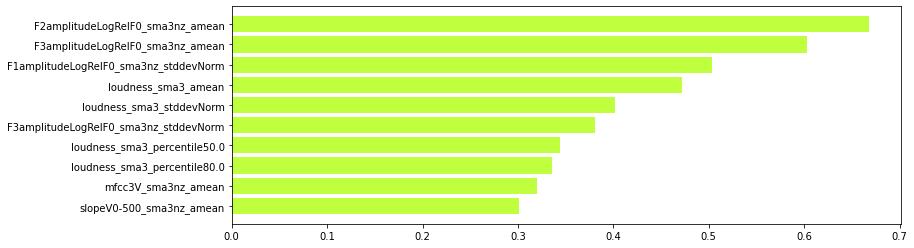

In [71]:
combined_feature_rank(labeled_array_egemaps, labels_list_egemaps, labeled_speakers_list, egemaps_feature_names, color=color, top_ten=True)
print('COMBINED STANDARD METHODS')

# Emotion 4: Fear

In [37]:
labeled_array_egemaps, labels_list_egemaps, labeled_speakers_list = label_division(normalised_embeddings_egemaps, labels, ['NEU', 'FEA'], speakers)
color='#FF9912'

## Part 1: Permutation Importance

permutation_importance


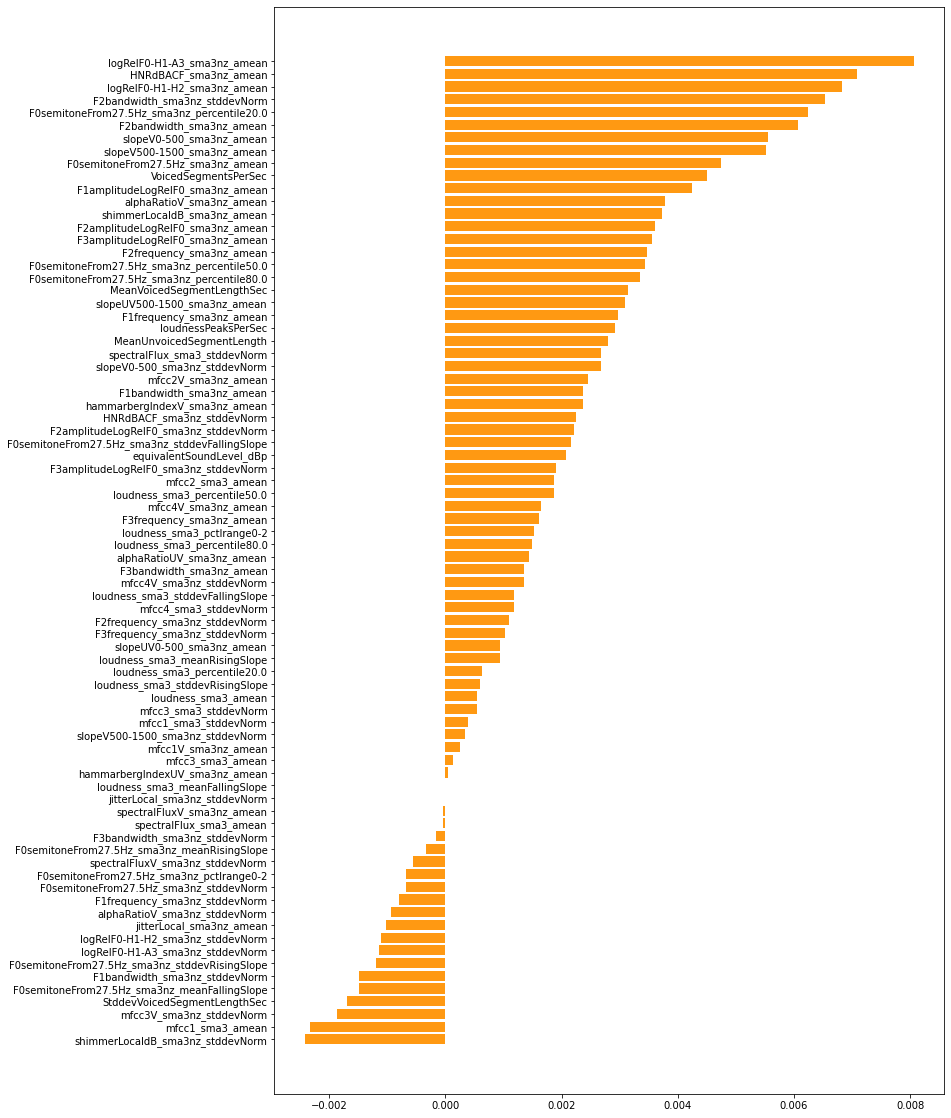

In [38]:
permutation_importance_method(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=False, plot=True)
print('permutation_importance')

['slopeUV500-1500_sma3nz_amean', 'logRelF0-H1-H2_sma3nz_amean', 'logRelF0-H1-H2_sma3nz_amean', 'F2bandwidth_sma3nz_stddevNorm', 'slopeV0-500_sma3nz_amean', 'VoicedSegmentsPerSec', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'HNRdBACF_sma3nz_amean']
permutation_importance


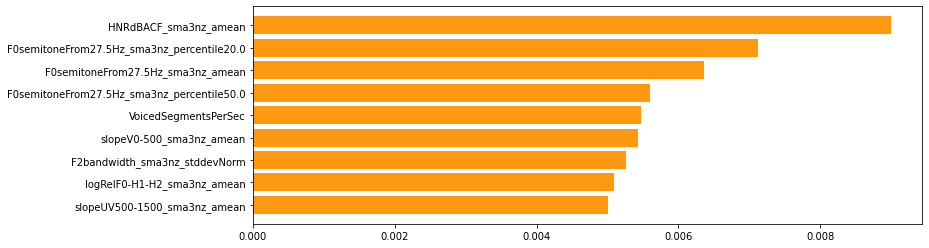

In [39]:
permutation_importance_method(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True, plot=True)
print('permutation_importance')

## Part 2: Standard methods

### Logistic regression

LOGISTIC REGRESSION


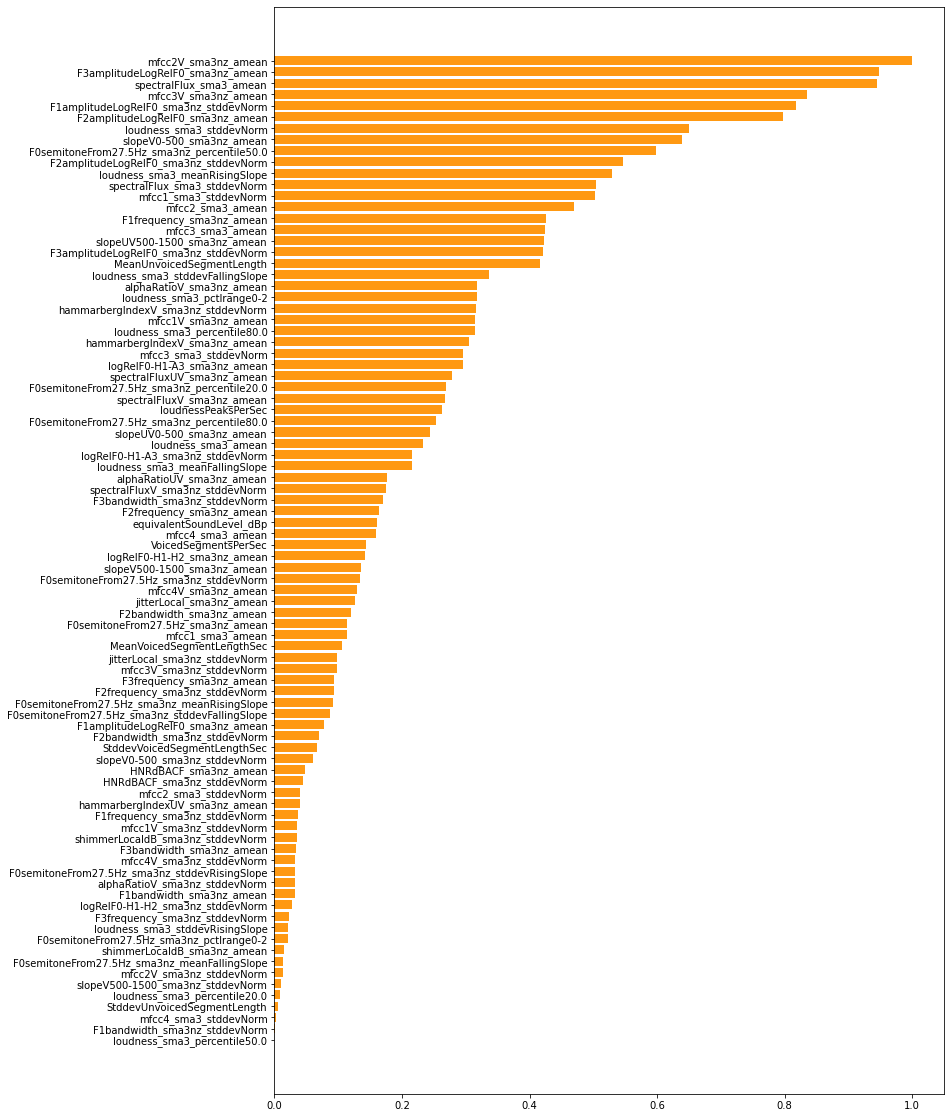

In [40]:

coef_logreg_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color)
print('LOGISTIC REGRESSION')

['F2amplitudeLogRelF0_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'slopeV0-500_sma3nz_amean', 'loudness_sma3_stddevNorm', 'F2amplitudeLogRelF0_sma3nz_amean', 'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean', 'spectralFlux_sma3_amean', 'F3amplitudeLogRelF0_sma3nz_amean', 'mfcc2V_sma3nz_amean']
LOGISTIC REGRESSION


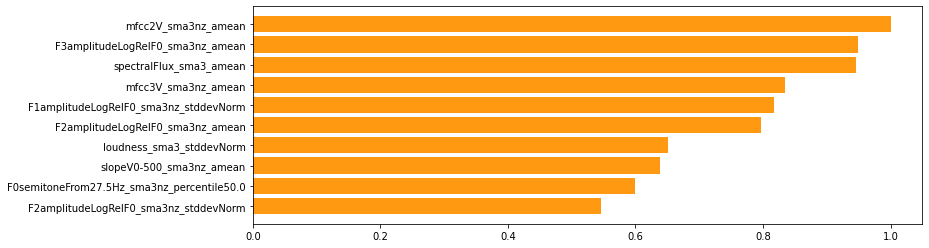

In [41]:

coef_logreg_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True)
print('LOGISTIC REGRESSION')

### SVM

SVM


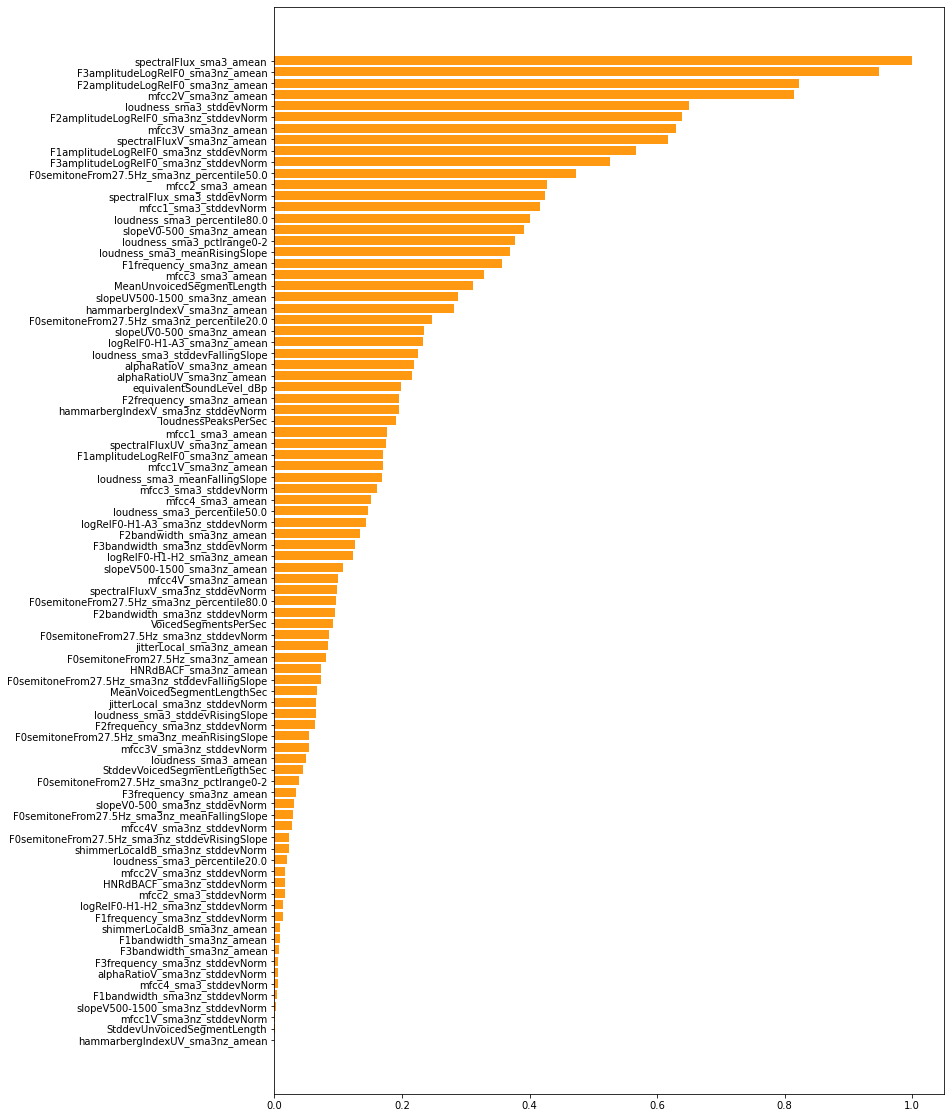

In [42]:

coef_svm_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color)
print('SVM')

['F3amplitudeLogRelF0_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'spectralFluxV_sma3nz_amean', 'mfcc3V_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'loudness_sma3_stddevNorm', 'mfcc2V_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_amean', 'F3amplitudeLogRelF0_sma3nz_amean', 'spectralFlux_sma3_amean']
SVM


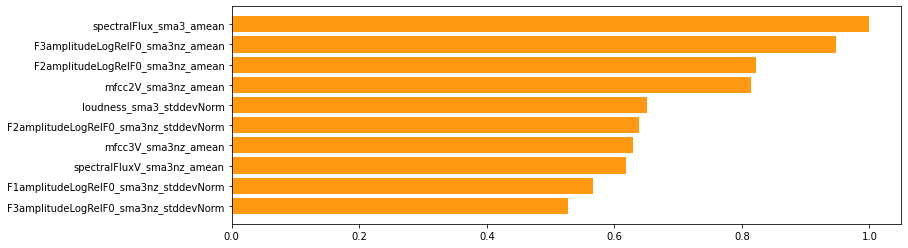

In [43]:
coef_svm_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True)
print('SVM')

### Random Forest

RANDOM FOREST


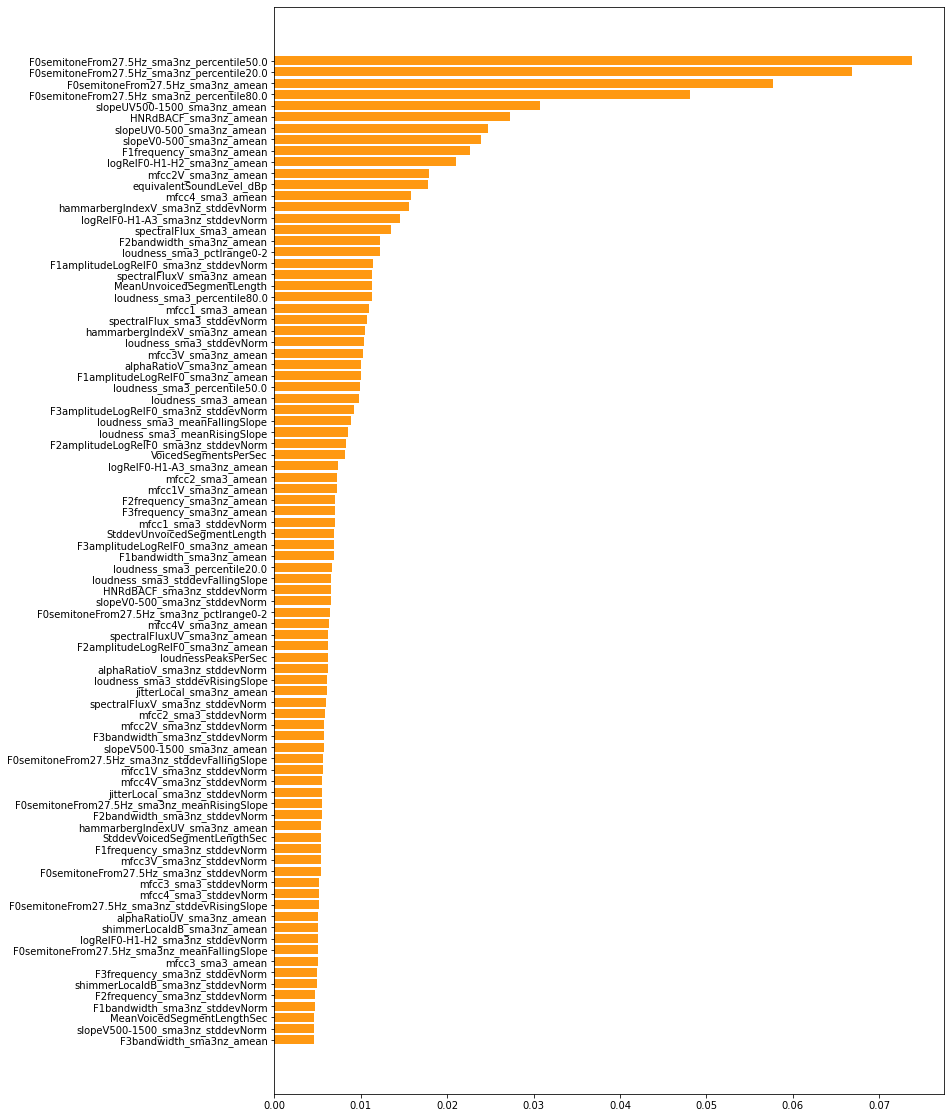

In [44]:

random_forest_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color)
print('RANDOM FOREST')

['F1frequency_sma3nz_amean', 'equivalentSoundLevel_dBp', 'slopeUV0-500_sma3nz_amean', 'slopeV0-500_sma3nz_amean', 'HNRdBACF_sma3nz_amean', 'slopeUV500-1500_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0']
RANDOM FOREST


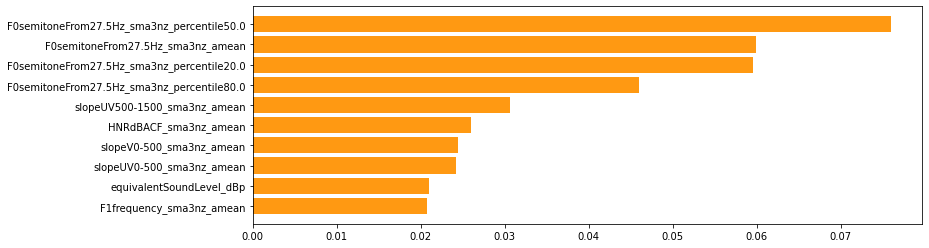

In [45]:
random_forest_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True)
print('RANDOM FOREST')

### Combined

recall_macro on test_set: 0.863144755319411
recall_macro on test_set: 0.8855820105820106
recall_macro on test_set: 0.871031746031746
COMBINED STANDARD METHODS


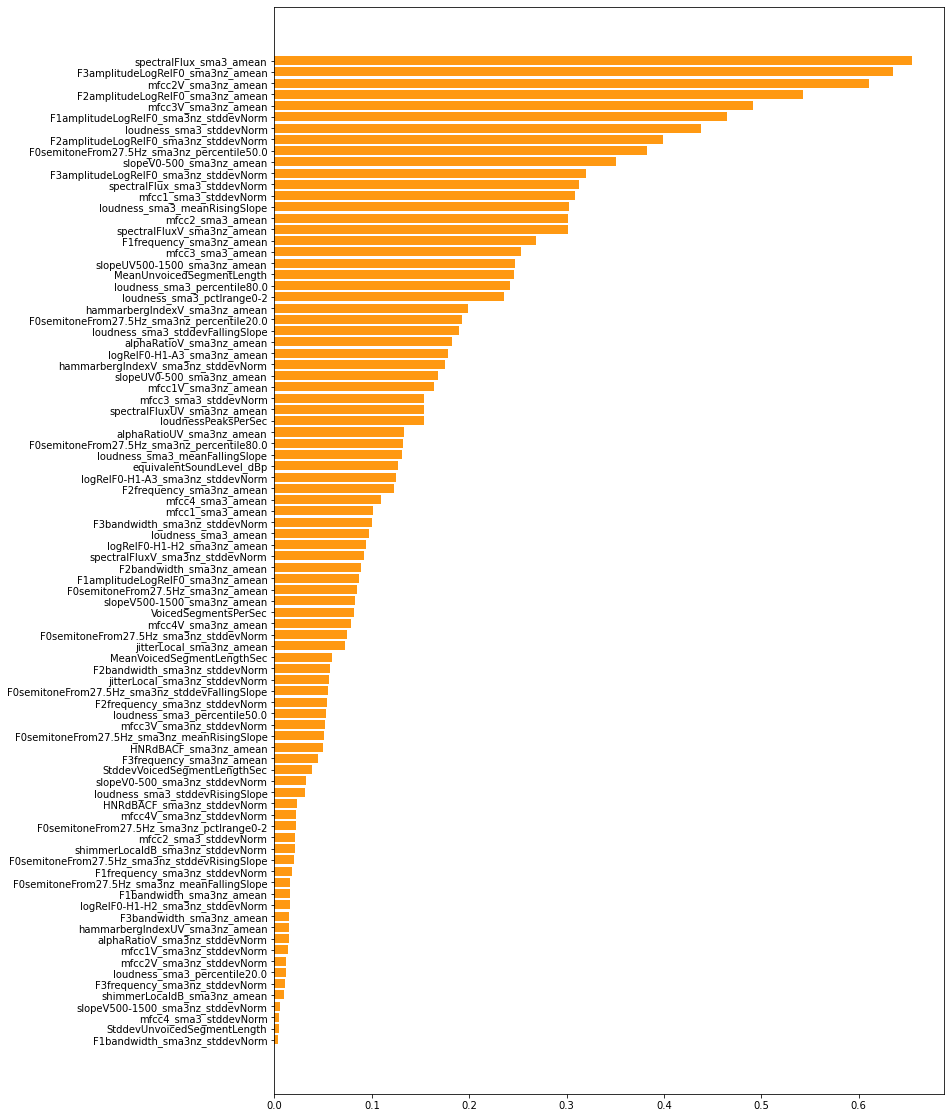

In [46]:
combined_feature_rank(labeled_array_egemaps, labels_list_egemaps, labeled_speakers_list, egemaps_feature_names, color=color, top_ten=False)
print('COMBINED STANDARD METHODS')

recall_macro on test_set: 0.8756981382978724
recall_macro on test_set: 0.8737746511359705
recall_macro on test_set: 0.855379188712522
['slopeV0-500_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'loudness_sma3_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_amean', 'mfcc2V_sma3nz_amean', 'F3amplitudeLogRelF0_sma3nz_amean', 'spectralFlux_sma3_amean']
COMBINED STANDARD METHODS


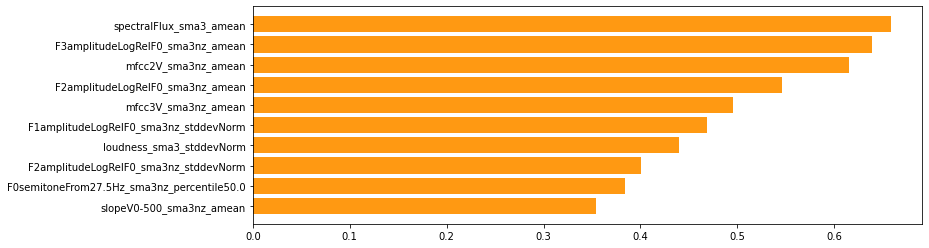

In [47]:
combined_feature_rank(labeled_array_egemaps, labels_list_egemaps, labeled_speakers_list, egemaps_feature_names, color=color, top_ten=True)
print('COMBINED STANDARD METHODS')

# Emotion 5: Disgust

In [50]:
labeled_array_egemaps, labels_list_egemaps, labeled_speakers_list = label_division(normalised_embeddings_egemaps, labels, ['NEU', 'DIS'], speakers)
color=	'#AB82FF'


## Part 1: Permutation Importance

permutation_importance


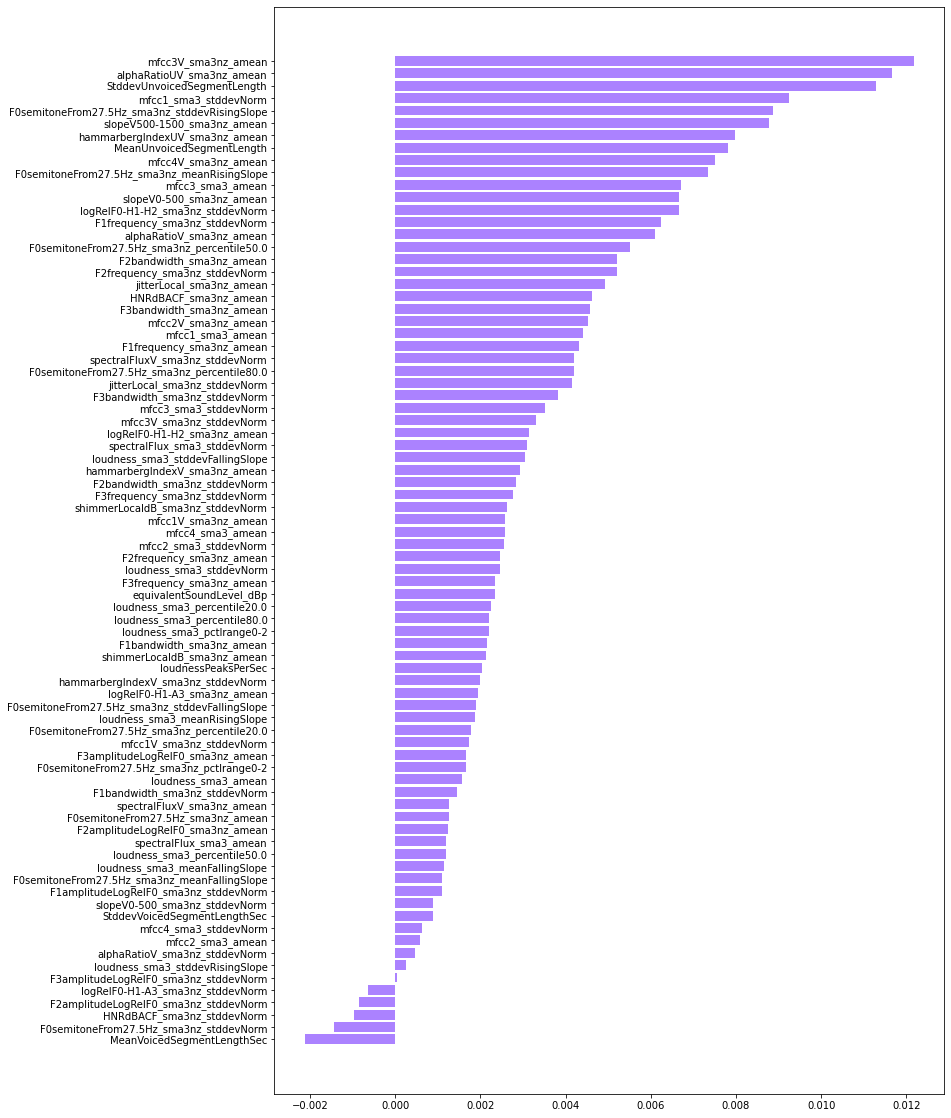

In [51]:
permutation_importance_method(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=False, plot=True)
print('permutation_importance')

['hammarbergIndexUV_sma3nz_amean', 'slopeV0-500_sma3nz_amean', 'mfcc4V_sma3nz_amean', 'mfcc1_sma3_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'slopeV500-1500_sma3nz_amean', 'mfcc1_sma3_stddevNorm', 'alphaRatioUV_sma3nz_amean', 'mfcc3V_sma3nz_amean', 'StddevUnvoicedSegmentLength']
permutation_importance


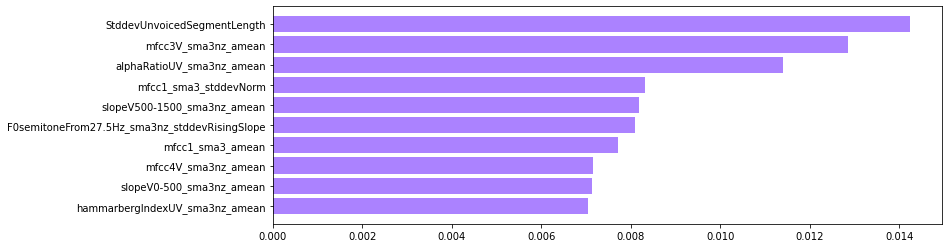

In [52]:
permutation_importance_method(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True, plot=True)
print('permutation_importance')

## Part 2: Standard methods

### Logistic regression

LOGISTIC REGRESSION


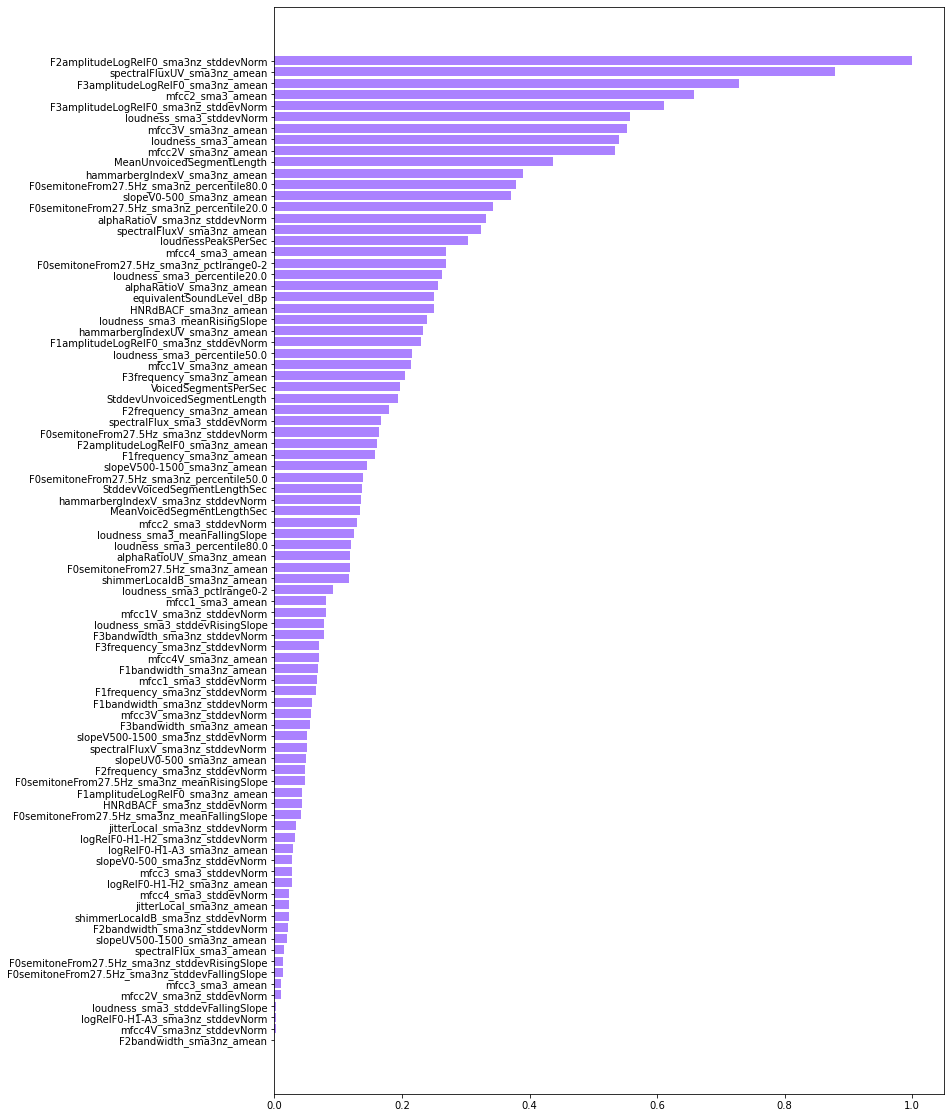

In [53]:

coef_logreg_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color)
print('LOGISTIC REGRESSION')

['MeanUnvoicedSegmentLength', 'mfcc2V_sma3nz_amean', 'loudness_sma3_amean', 'mfcc3V_sma3nz_amean', 'loudness_sma3_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'mfcc2_sma3_amean', 'F3amplitudeLogRelF0_sma3nz_amean', 'spectralFluxUV_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_stddevNorm']
LOGISTIC REGRESSION


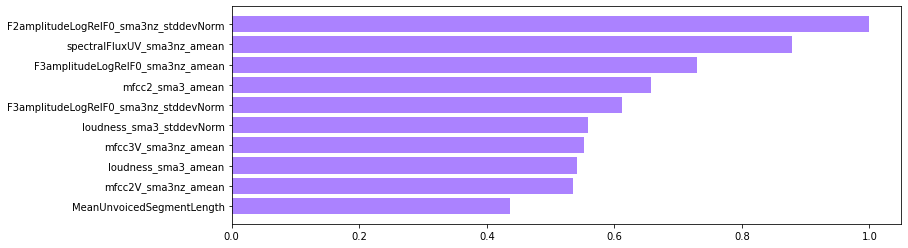

In [54]:

coef_logreg_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True)
print('LOGISTIC REGRESSION')

### SVM

SVM


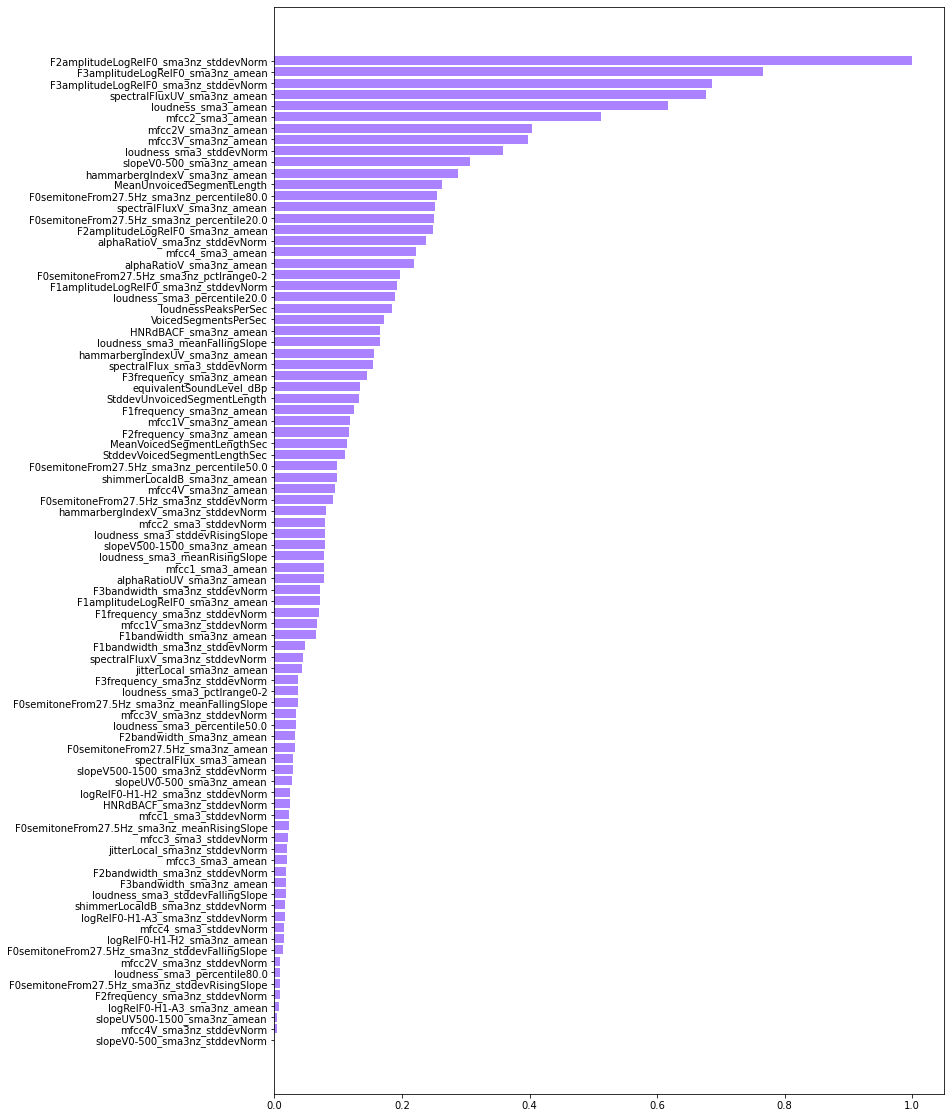

In [55]:

coef_svm_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color)
print('SVM')

['slopeV0-500_sma3nz_amean', 'loudness_sma3_stddevNorm', 'mfcc3V_sma3nz_amean', 'mfcc2V_sma3nz_amean', 'mfcc2_sma3_amean', 'loudness_sma3_amean', 'spectralFluxUV_sma3nz_amean', 'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_stddevNorm']
SVM


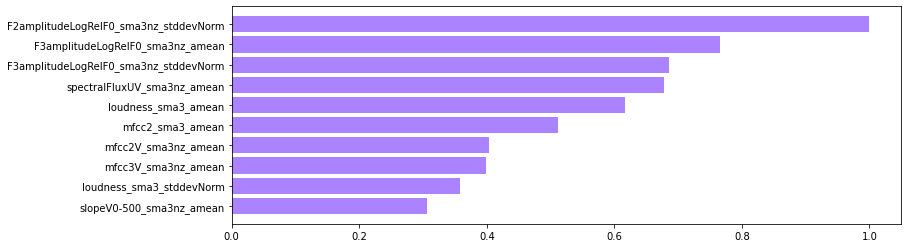

In [56]:
coef_svm_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True)
print('SVM')

### Random Forest

RANDOM FOREST


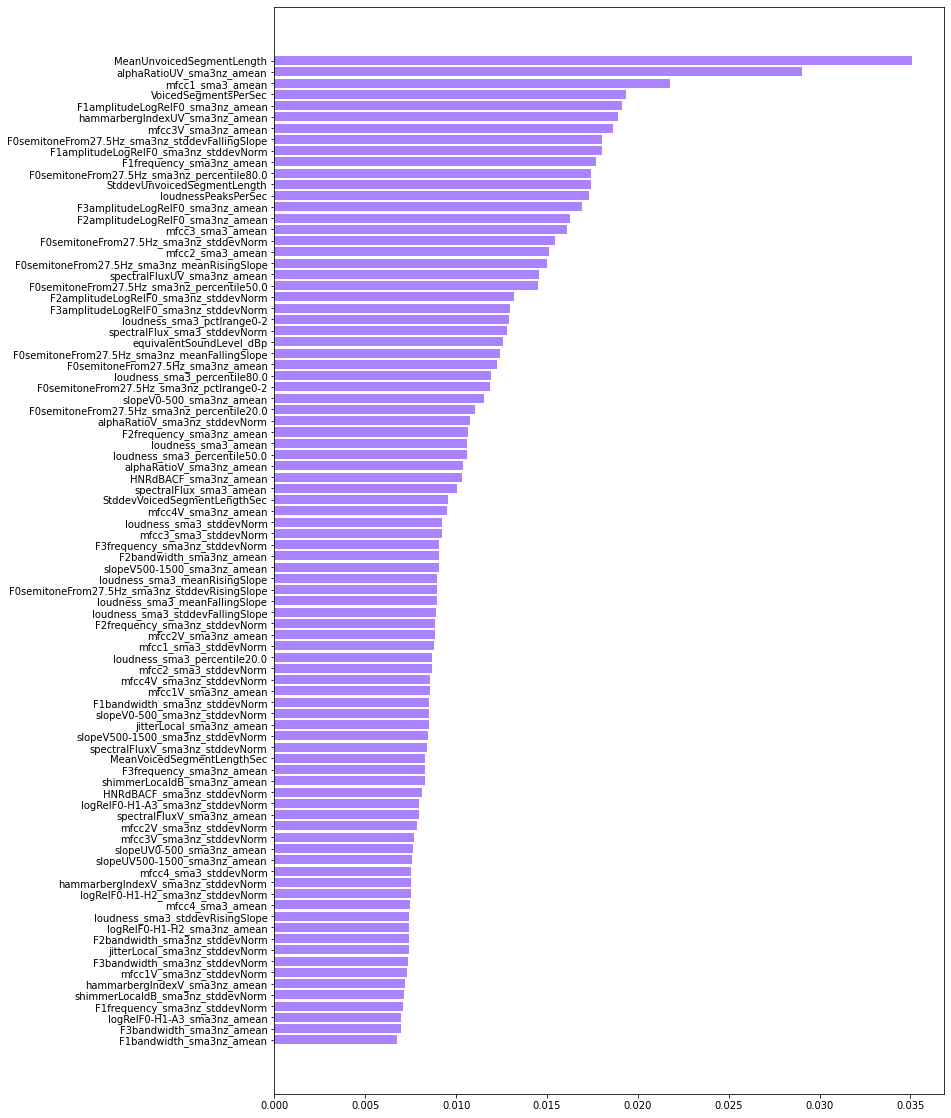

In [57]:

random_forest_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color)
print('RANDOM FOREST')

['F1frequency_sma3nz_amean', 'VoicedSegmentsPerSec', 'StddevUnvoicedSegmentLength', 'F1amplitudeLogRelF0_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean', 'F1amplitudeLogRelF0_sma3nz_amean', 'hammarbergIndexUV_sma3nz_amean', 'mfcc1_sma3_amean', 'alphaRatioUV_sma3nz_amean', 'MeanUnvoicedSegmentLength']
RANDOM FOREST


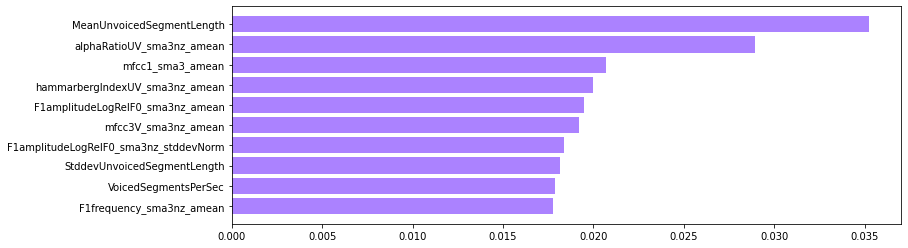

In [58]:
random_forest_plot(labeled_array_egemaps, labels_list_egemaps, egemaps_feature_names, color=color, top_ten=True)
print('RANDOM FOREST')

### Combined

recall_macro on test_set: 0.7821064098153881
recall_macro on test_set: 0.8168731568281793
recall_macro on test_set: 0.7554409608382622
COMBINED STANDARD METHODS


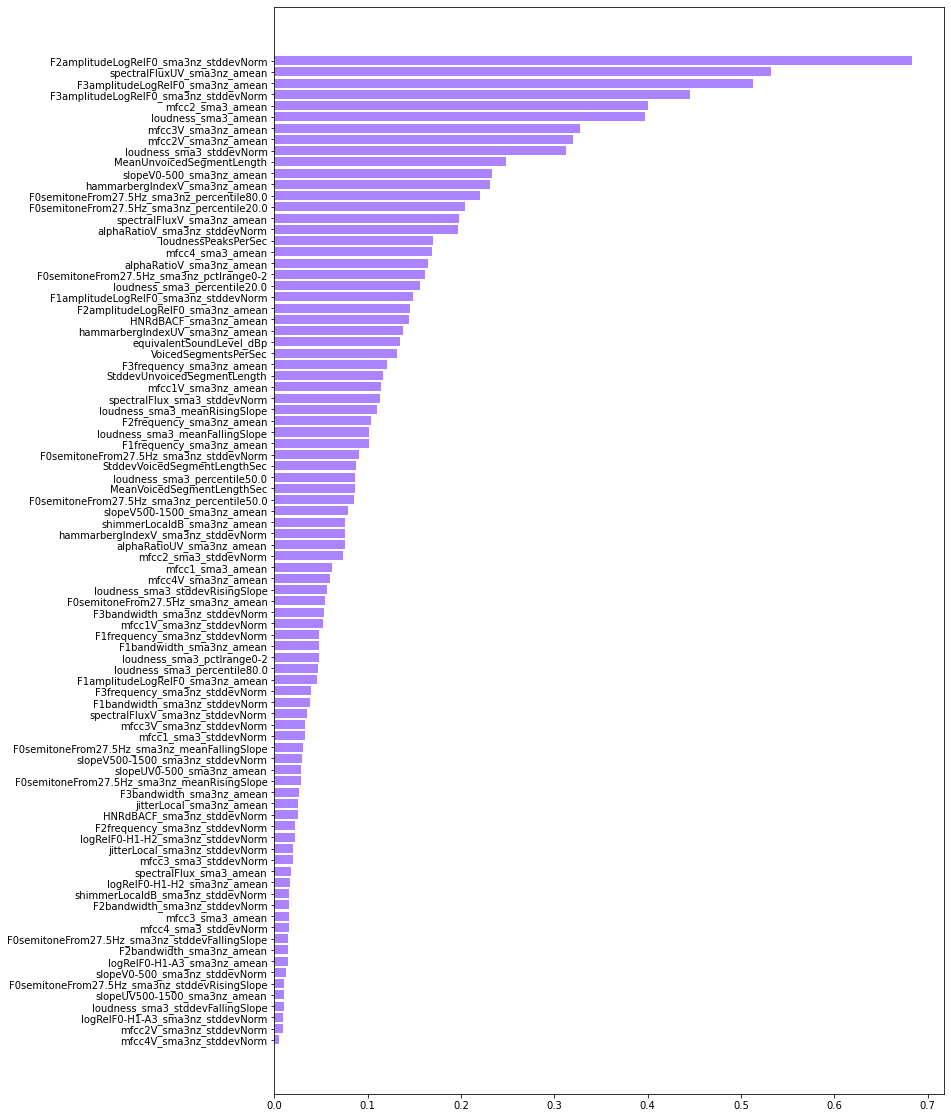

In [59]:
combined_feature_rank(labeled_array_egemaps, labels_list_egemaps, labeled_speakers_list, egemaps_feature_names, color=color, top_ten=False)
print('COMBINED STANDARD METHODS')

recall_macro on test_set: 0.7867892976588629
recall_macro on test_set: 0.8026793973833752
recall_macro on test_set: 0.7689210950080515
['MeanUnvoicedSegmentLength', 'loudness_sma3_stddevNorm', 'mfcc2V_sma3nz_amean', 'mfcc3V_sma3nz_amean', 'loudness_sma3_amean', 'mfcc2_sma3_amean', 'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean', 'spectralFluxUV_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_stddevNorm']
COMBINED STANDARD METHODS


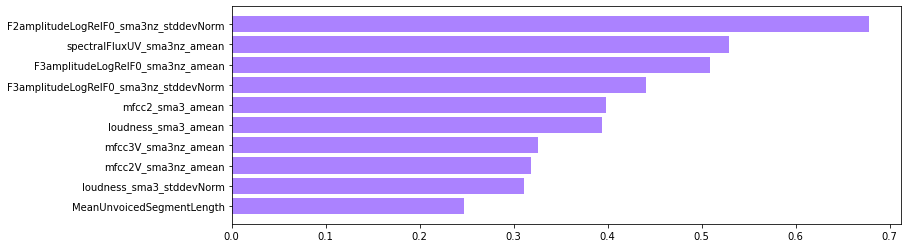

In [60]:
combined_feature_rank(labeled_array_egemaps, labels_list_egemaps, labeled_speakers_list, egemaps_feature_names, color=color, top_ten=True)
print('COMBINED STANDARD METHODS')